In [1]:
import os
import numpy
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.image as mpimg
from itertools import cycle
import seaborn as sns
import statsmodels.api as sm 
from scipy.interpolate import interp1d
from prophet import Prophet

pd.set_option('display.max_columns', 50)
plt.style.use('bmh')
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [2]:
%%time
oj = os.path.join
INPUT_DIR = '../input/m5-forecasting-accuracy/'
train = pd.read_csv(oj(INPUT_DIR, 'trainset.csv'))
price = pd.read_csv(oj(INPUT_DIR, 'sell_prices.csv'))
calendar = pd.read_csv(oj(INPUT_DIR, 'calendar.csv'))

sample_submit = pd.read_csv(oj(INPUT_DIR, 'submit.csv'))

CPU times: total: 3.09 s
Wall time: 7.67 s


In [6]:
print(calendar['event_name_1'].unique())

[nan 'SuperBowl' 'ValentinesDay' 'PresidentsDay' 'LentStart' 'LentWeek2'
 'StPatricksDay' 'Purim End' 'OrthodoxEaster' 'Pesach End' 'Cinco De Mayo'
 "Mother's day" 'MemorialDay' 'NBAFinalsStart' 'NBAFinalsEnd'
 "Father's day" 'IndependenceDay' 'Ramadan starts' 'Eid al-Fitr'
 'LaborDay' 'ColumbusDay' 'Halloween' 'EidAlAdha' 'VeteransDay'
 'Thanksgiving' 'Christmas' 'Chanukah End' 'NewYear' 'OrthodoxChristmas'
 'MartinLutherKingDay' 'Easter']


In [7]:
print(calendar['event_type_1'].unique())

[nan 'Sporting' 'Cultural' 'National' 'Religious']


In [8]:
print(calendar['event_name_2'].unique())

[nan 'Easter' 'Cinco De Mayo' 'OrthodoxEaster' "Father's day"]


In [9]:
print(calendar['event_type_2'].unique())

[nan 'Cultural' 'Religious']


In [10]:
print(price.head())
print(price.shape)

  store_id        item_id  wm_yr_wk  sell_price
0     CA_1  HOBBIES_1_001     11325        9.58
1     CA_1  HOBBIES_1_001     11326        9.58
2     CA_1  HOBBIES_1_001     11327        8.26
3     CA_1  HOBBIES_1_001     11328        8.26
4     CA_1  HOBBIES_1_001     11329        8.26
(6841121, 4)


In [26]:
print(train.shape)

(30490, 1933)


C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  1        8.38
1923  2016-05-05  d_1924     11614  1        8.38
1924  2016-05-06  d_1925     11614  0        8.38
1925  2016-05-07  d_1926     11615  2        8.38
1926  2016-05-08  d_1927     11615  1        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:54:47 - cmdstanpy - INFO - Chain [1] start processing
21:54:47 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29 -0.040034   -0.748773    0.852698    -0.040034    -0.040034   
1    2011-01-30 -0.039906   -0.863653    0.662538    -0.039906    -0.039906   
2    2011-01-31 -0.039777   -0.847971    0.689100    -0.039777    -0.039777   
3    2011-02-01 -0.039649   -0.844707    0.729098    -0.039649    -0.039649   
4    2011-02-02 -0.039521   -0.930503    0.664565    -0.039521    -0.039521   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  0.875250   -0.208680    1.392868     0.875250     0.875250   
1937 2016-05-19  0.875833   -0.150300    1.432878     0.875833     0.875833   
1938 2016-05-20  0.876415   -0.121977    1.435899     0.876415     0.876

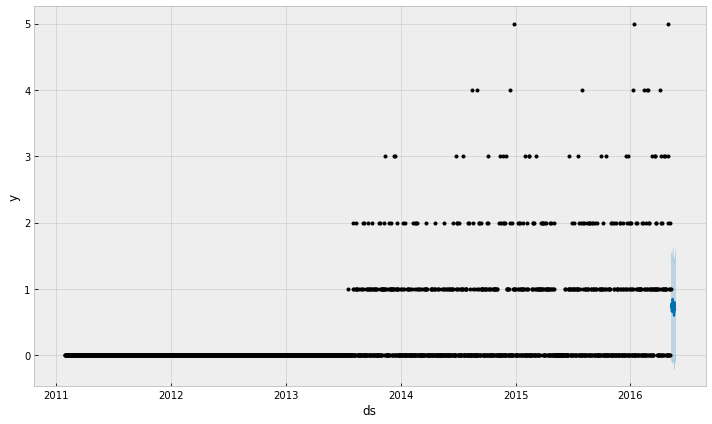

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  1        8.38
1923  2016-05-05  d_1924     11614  0        8.38
1924  2016-05-06  d_1925     11614  0        8.38
1925  2016-05-07  d_1926     11615  0        8.38
1926  2016-05-08  d_1927     11615  0        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:54:50 - cmdstanpy - INFO - Chain [1] start processing
21:54:50 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29  0.157212   -0.452121    0.921195     0.157212     0.157212   
1    2011-01-30  0.157344   -0.518006    0.870203     0.157344     0.157344   
2    2011-01-31  0.157476   -0.568868    0.814593     0.157476     0.157476   
3    2011-02-01  0.157608   -0.550793    0.790709     0.157608     0.157608   
4    2011-02-02  0.157739   -0.567445    0.744076     0.157739     0.157739   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  0.350297   -0.314565    1.003500     0.350297     0.350297   
1937 2016-05-19  0.350382   -0.265957    1.022710     0.350382     0.350382   
1938 2016-05-20  0.350466   -0.303037    1.088437     0.350466     0.350

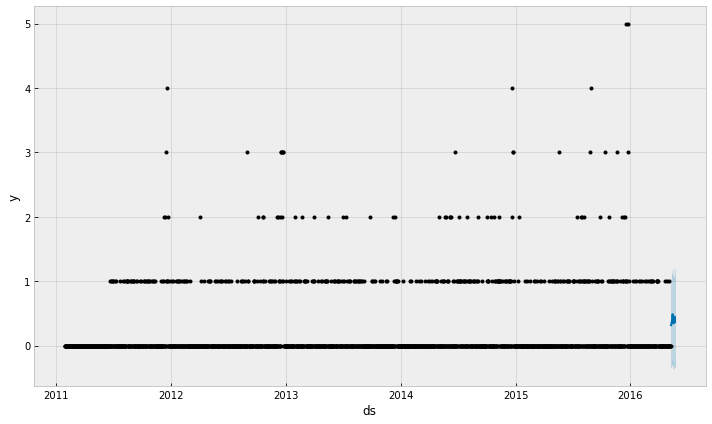

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  0        8.38
1923  2016-05-05  d_1924     11614  0        8.38
1924  2016-05-06  d_1925     11614  2        8.38
1925  2016-05-07  d_1926     11615  1        8.38
1926  2016-05-08  d_1927     11615  3        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:54:52 - cmdstanpy - INFO - Chain [1] start processing
21:54:52 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29 -0.013844   -0.495496    0.592240    -0.013844    -0.013844   
1    2011-01-30 -0.013814   -0.669714    0.512002    -0.013814    -0.013814   
2    2011-01-31 -0.013784   -0.643481    0.487570    -0.013784    -0.013784   
3    2011-02-01 -0.013755   -0.618461    0.485446    -0.013755    -0.013755   
4    2011-02-02 -0.013725   -0.625713    0.495532    -0.013725    -0.013725   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  0.714382    0.194812    1.326944     0.714382     0.714382   
1937 2016-05-19  0.715339    0.214351    1.279583     0.715339     0.715339   
1938 2016-05-20  0.716296    0.232496    1.350440     0.716296     0.716

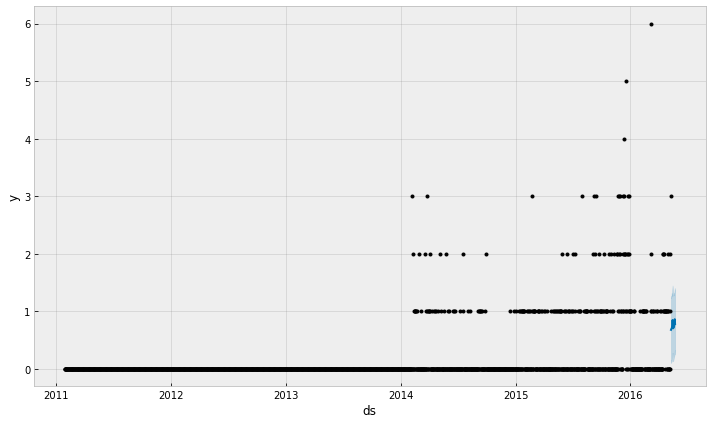

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  0        8.38
1923  2016-05-05  d_1924     11614  0        8.38
1924  2016-05-06  d_1925     11614  2        8.38
1925  2016-05-07  d_1926     11615  2        8.38
1926  2016-05-08  d_1927     11615  4        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:54:54 - cmdstanpy - INFO - Chain [1] start processing
21:54:55 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29  0.899316   -0.527882    3.979090     0.899316     0.899316   
1    2011-01-30  0.900797    0.237135    4.830070     0.900797     0.900797   
2    2011-01-31  0.902278   -1.643822    2.939075     0.902278     0.902278   
3    2011-02-01  0.903759   -2.041576    2.654035     0.903759     0.903759   
4    2011-02-02  0.905240   -2.083483    2.577443     0.905240     0.905240   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  1.832531   -0.882562    3.659321     1.832531     1.832531   
1937 2016-05-19  1.831518   -0.467631    3.954561     1.831518     1.831518   
1938 2016-05-20  1.830505   -0.498868    3.936454     1.830505     1.830

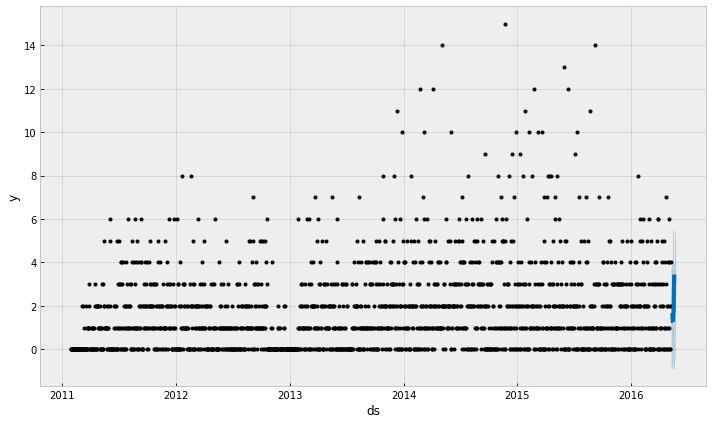

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  1        8.38
1923  2016-05-05  d_1924     11614  1        8.38
1924  2016-05-06  d_1925     11614  3        8.38
1925  2016-05-07  d_1926     11615  2        8.38
1926  2016-05-08  d_1927     11615  3        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:54:57 - cmdstanpy - INFO - Chain [1] start processing
21:54:57 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29  0.569030   -0.605729    2.565029     0.569030     0.569030   
1    2011-01-30  0.570018   -0.542591    2.617380     0.570018     0.570018   
2    2011-01-31  0.571006   -1.192999    2.040118     0.571006     0.571006   
3    2011-02-01  0.571995   -1.135338    2.106943     0.571995     0.571995   
4    2011-02-02  0.572983   -1.040743    2.056270     0.572983     0.572983   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  1.269774   -0.417519    2.906128     1.269774     1.269774   
1937 2016-05-19  1.270147   -0.480708    2.803041     1.270147     1.270147   
1938 2016-05-20  1.270520   -0.250537    2.863017     1.270520     1.270

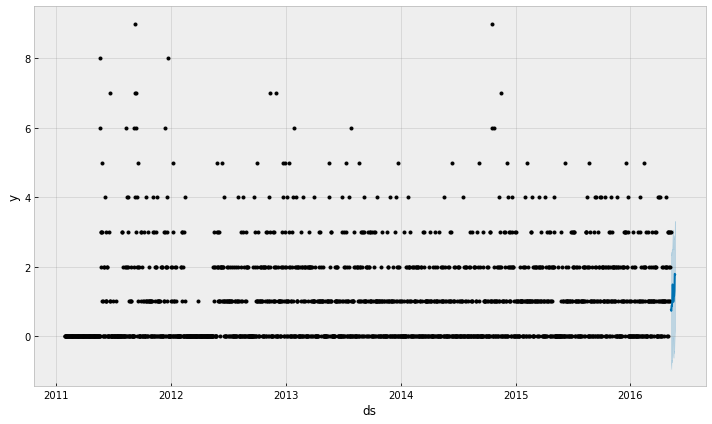

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  0        8.38
1923  2016-05-05  d_1924     11614  0        8.38
1924  2016-05-06  d_1925     11614  2        8.38
1925  2016-05-07  d_1926     11615  1        8.38
1926  2016-05-08  d_1927     11615  0        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:54:59 - cmdstanpy - INFO - Chain [1] start processing
21:55:00 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29 -0.415458   -2.111860    1.631288    -0.415458    -0.415458   
1    2011-01-30 -0.412531   -2.160843    1.565105    -0.412531    -0.412531   
2    2011-01-31 -0.409604   -2.085707    1.567343    -0.409604    -0.409604   
3    2011-02-01 -0.406677   -2.286729    1.494854    -0.406677    -0.406677   
4    2011-02-02 -0.403750   -2.314693    1.466436    -0.403750    -0.403750   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  0.542760   -1.417165    2.546470     0.542760     0.542760   
1937 2016-05-19  0.542031   -1.206430    2.486948     0.542031     0.542031   
1938 2016-05-20  0.541303   -1.433742    2.393212     0.541303     0.541

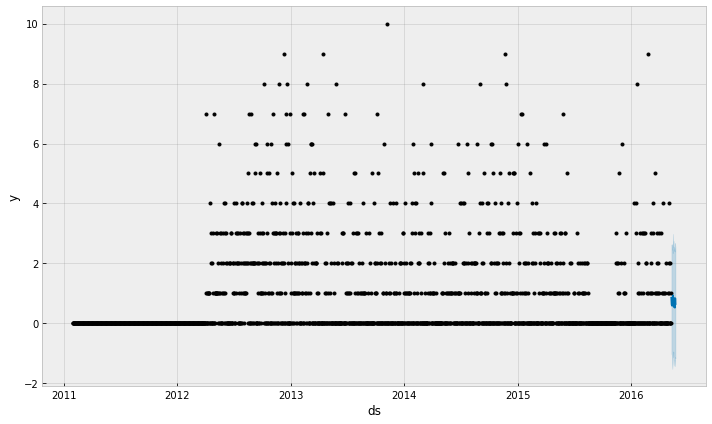

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  0        8.38
1923  2016-05-05  d_1924     11614  0        8.38
1924  2016-05-06  d_1925     11614  0        8.38
1925  2016-05-07  d_1926     11615  1        8.38
1926  2016-05-08  d_1927     11615  0        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:55:02 - cmdstanpy - INFO - Chain [1] start processing
21:55:02 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29 -0.055690   -0.524951    0.675619    -0.055690    -0.055690   
1    2011-01-30 -0.055383   -0.585607    0.664424    -0.055383    -0.055383   
2    2011-01-31 -0.055075   -0.625827    0.610745    -0.055075    -0.055075   
3    2011-02-01 -0.054768   -0.601330    0.576105    -0.054768    -0.054768   
4    2011-02-02 -0.054460   -0.677496    0.554949    -0.054460    -0.054460   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  0.287215   -0.297275    0.910426     0.287215     0.287215   
1937 2016-05-19  0.287154   -0.326815    0.882063     0.287154     0.287154   
1938 2016-05-20  0.287092   -0.313280    0.912884     0.287092     0.287

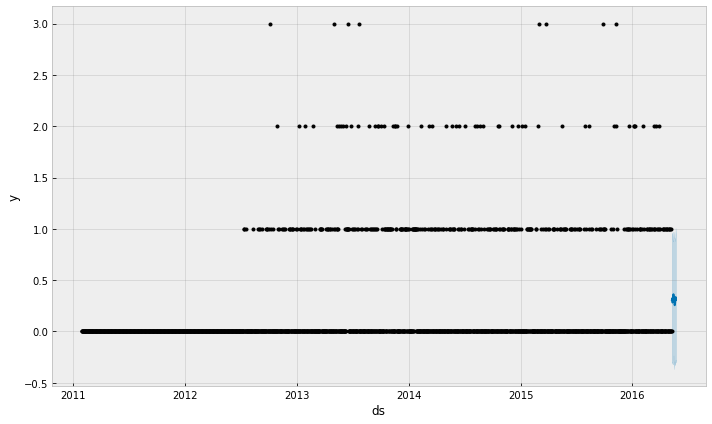

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk   y  sell_price
0     2011-01-29     d_1     11101  12         NaN
1     2011-01-30     d_2     11101  15         NaN
2     2011-01-31     d_3     11101   0         NaN
3     2011-02-01     d_4     11101   0         NaN
4     2011-02-02     d_5     11101   0         NaN
...          ...     ...       ...  ..         ...
1922  2016-05-04  d_1923     11614   8        8.38
1923  2016-05-05  d_1924     11614   5        8.38
1924  2016-05-06  d_1925     11614   8        8.38
1925  2016-05-07  d_1926     11615   5        8.38
1926  2016-05-08  d_1927     11615   0        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:55:04 - cmdstanpy - INFO - Chain [1] start processing
21:55:04 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29   5.568199   -1.409344   21.040984     5.568199     5.568199   
1    2011-01-30   5.571520   -3.629545   18.409137     5.571520     5.571520   
2    2011-01-31   5.574842   -3.344031   19.078967     5.574842     5.574842   
3    2011-02-01   5.578163   -4.483531   17.969703     5.578163     5.578163   
4    2011-02-02   5.581484   -2.631307   19.758546     5.581484     5.581484   
...         ...        ...         ...         ...          ...          ...   
1936 2016-05-18  10.442680   -1.604501   21.151277    10.442680    10.442680   
1937 2016-05-19  10.445611   -2.312137   20.120448    10.445611    10.445611   
1938 2016-05-20  10.448543   -1.756083   21.505260    10.448543

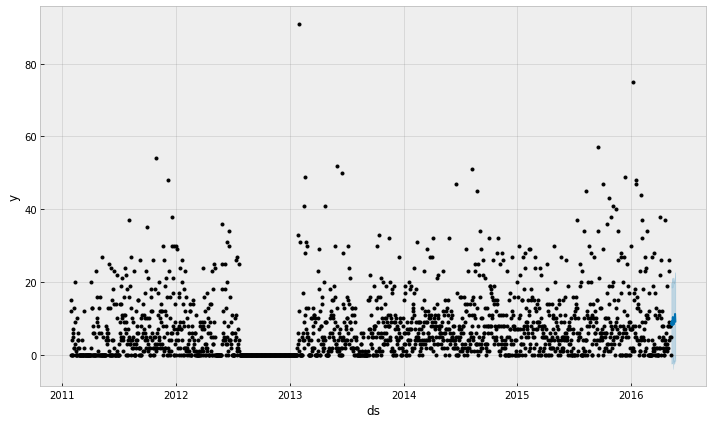

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  2         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  7         NaN
3     2011-02-01     d_4     11101  3         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  0        8.38
1923  2016-05-05  d_1924     11614  8        8.38
1924  2016-05-06  d_1925     11614  0        8.38
1925  2016-05-07  d_1926     11615  0        8.38
1926  2016-05-08  d_1927     11615  0        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:55:06 - cmdstanpy - INFO - Chain [1] start processing
21:55:06 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29  2.027220   -0.165755    4.595871     2.027220     2.027220   
1    2011-01-30  2.026413   -0.526486    4.479444     2.026413     2.026413   
2    2011-01-31  2.025605   -0.535896    4.410162     2.025605     2.025605   
3    2011-02-01  2.024798   -0.434615    4.559329     2.024798     2.024798   
4    2011-02-02  2.023990   -0.684248    4.230895     2.023990     2.023990   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  0.169239   -2.450359    2.559536     0.169239     0.169239   
1937 2016-05-19  0.168068   -2.251219    2.487959     0.168068     0.168068   
1938 2016-05-20  0.166897   -2.353423    2.662108     0.166897     0.166

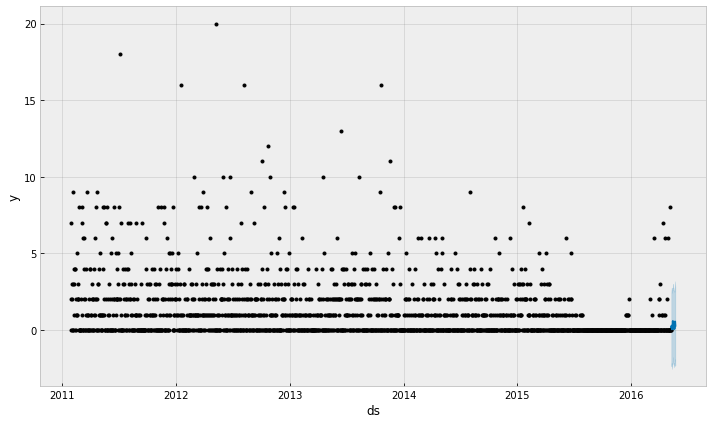

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  1         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  0        8.38
1923  2016-05-05  d_1924     11614  0        8.38
1924  2016-05-06  d_1925     11614  2        8.38
1925  2016-05-07  d_1926     11615  0        8.38
1926  2016-05-08  d_1927     11615  2        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:55:09 - cmdstanpy - INFO - Chain [1] start processing
21:55:09 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29  0.311607   -0.621102    1.672527     0.311607     0.311607   
1    2011-01-30  0.312875   -0.239076    1.999946     0.312875     0.312875   
2    2011-01-31  0.314142   -0.771502    1.527388     0.314142     0.314142   
3    2011-02-01  0.315410   -0.784735    1.535891     0.315410     0.315410   
4    2011-02-02  0.316677   -0.765052    1.388356     0.316677     0.316677   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  0.537330   -0.813806    1.558715     0.537330     0.537330   
1937 2016-05-19  0.537028   -0.811069    1.441902     0.537028     0.537028   
1938 2016-05-20  0.536726   -0.672338    1.540187     0.536726     0.536

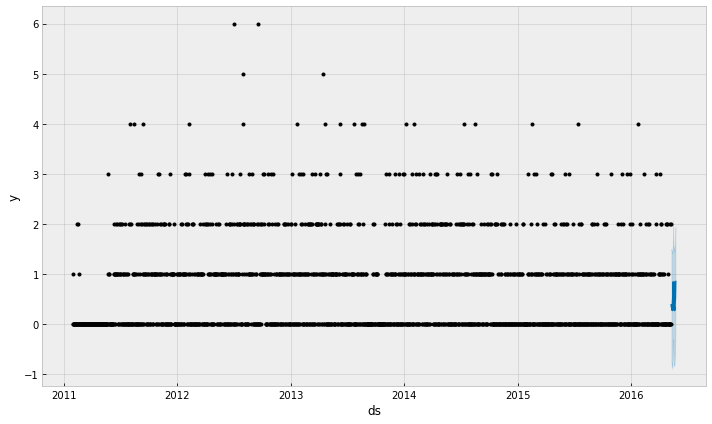

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  0        8.38
1923  2016-05-05  d_1924     11614  0        8.38
1924  2016-05-06  d_1925     11614  0        8.38
1925  2016-05-07  d_1926     11615  0        8.38
1926  2016-05-08  d_1927     11615  0        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:55:11 - cmdstanpy - INFO - Chain [1] start processing
21:55:11 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29 -0.034959   -0.440310    0.300634    -0.034959    -0.034959   
1    2011-01-30 -0.034706   -0.391748    0.326955    -0.034706    -0.034706   
2    2011-01-31 -0.034453   -0.433198    0.274427    -0.034453    -0.034453   
3    2011-02-01 -0.034200   -0.449354    0.247770    -0.034200    -0.034200   
4    2011-02-02 -0.033947   -0.435665    0.288734    -0.033947    -0.033947   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  0.107864   -0.186360    0.519336     0.107864     0.107864   
1937 2016-05-19  0.107960   -0.217272    0.509868     0.107960     0.107960   
1938 2016-05-20  0.108057   -0.168116    0.521052     0.108057     0.108

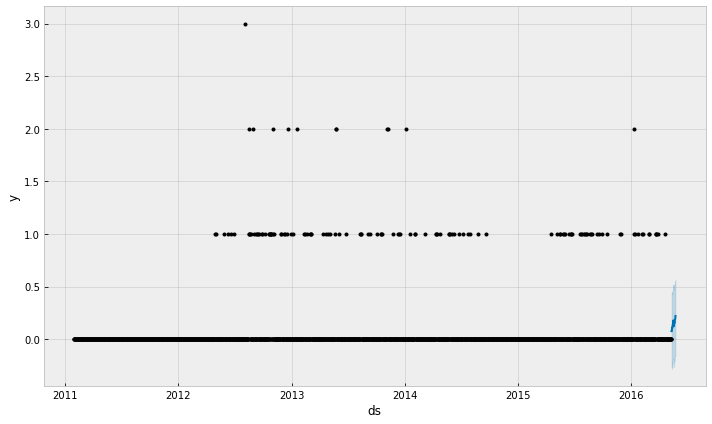

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  2         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  0        8.38
1923  2016-05-05  d_1924     11614  0        8.38
1924  2016-05-06  d_1925     11614  1        8.38
1925  2016-05-07  d_1926     11615  0        8.38
1926  2016-05-08  d_1927     11615  0        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:55:13 - cmdstanpy - INFO - Chain [1] start processing
21:55:14 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29  0.556830   -0.265575    1.346012     0.556830     0.556830   
1    2011-01-30  0.556691   -0.142384    1.435919     0.556691     0.556691   
2    2011-01-31  0.556553   -0.329545    1.238518     0.556553     0.556553   
3    2011-02-01  0.556414   -0.376658    1.132145     0.556414     0.556414   
4    2011-02-02  0.556276   -0.458582    1.224504     0.556276     0.556276   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  0.157962   -0.602229    0.953522     0.157962     0.157962   
1937 2016-05-19  0.157687   -0.599758    1.017846     0.157687     0.157687   
1938 2016-05-20  0.157412   -0.505212    1.046414     0.157412     0.157

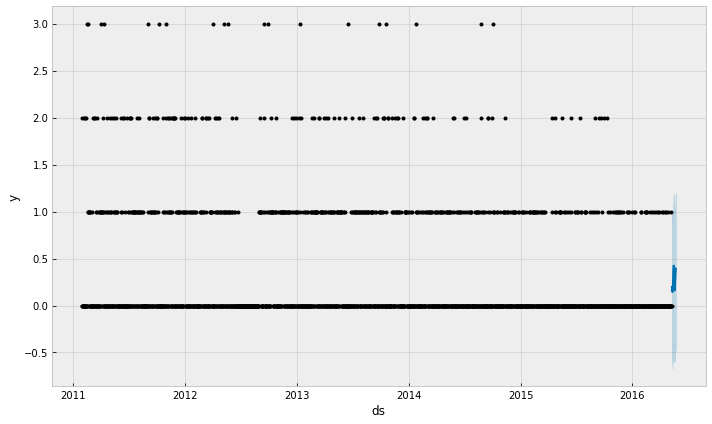

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  0        8.38
1923  2016-05-05  d_1924     11614  0        8.38
1924  2016-05-06  d_1925     11614  1        8.38
1925  2016-05-07  d_1926     11615  0        8.38
1926  2016-05-08  d_1927     11615  0        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:55:16 - cmdstanpy - INFO - Chain [1] start processing
21:55:16 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29 -0.081904   -0.778333    0.646674    -0.081904    -0.081904   
1    2011-01-30 -0.081413   -0.718334    0.695503    -0.081413    -0.081413   
2    2011-01-31 -0.080922   -0.874613    0.482826    -0.080922    -0.080922   
3    2011-02-01 -0.080431   -0.883339    0.558322    -0.080431    -0.080431   
4    2011-02-02 -0.079940   -0.802551    0.527806    -0.079940    -0.079940   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  0.377919   -0.373469    1.133184     0.377919     0.377919   
1937 2016-05-19  0.377954   -0.365575    1.039197     0.377954     0.377954   
1938 2016-05-20  0.377990   -0.317653    1.107639     0.377990     0.377

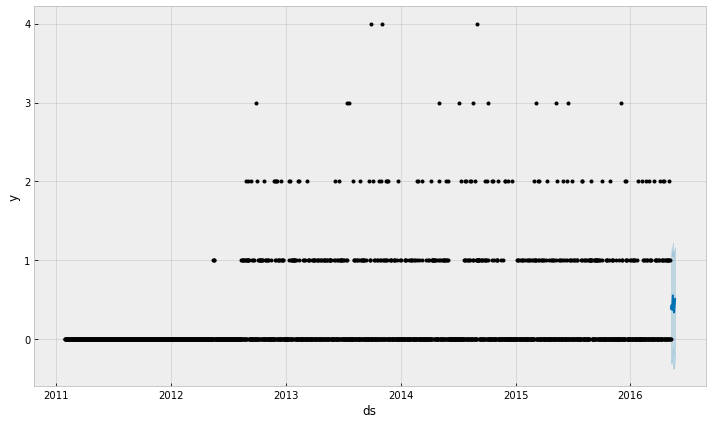

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  3        8.38
1923  2016-05-05  d_1924     11614  1        8.38
1924  2016-05-06  d_1925     11614  4        8.38
1925  2016-05-07  d_1926     11615  1        8.38
1926  2016-05-08  d_1927     11615  2        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:55:18 - cmdstanpy - INFO - Chain [1] start processing
21:55:18 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29 -0.108838   -1.962925    1.800851    -0.108838    -0.108838   
1    2011-01-30 -0.106269   -2.075793    1.767221    -0.106269    -0.106269   
2    2011-01-31 -0.103701   -2.246012    1.255491    -0.103701    -0.103701   
3    2011-02-01 -0.101133   -2.379322    1.364935    -0.101133    -0.101133   
4    2011-02-02 -0.098565   -2.392203    1.375459    -0.098565    -0.098565   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  1.896977   -0.185186    3.564501     1.896977     1.896977   
1937 2016-05-19  1.897522   -0.056424    3.798849     1.897522     1.897522   
1938 2016-05-20  1.898067    0.305950    4.181606     1.898067     1.898

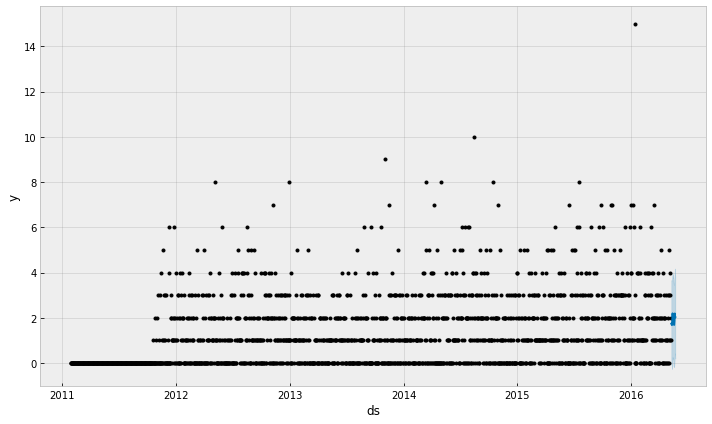

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  4         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  5         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  1        8.38
1923  2016-05-05  d_1924     11614  0        8.38
1924  2016-05-06  d_1925     11614  6        8.38
1925  2016-05-07  d_1926     11615  5        8.38
1926  2016-05-08  d_1927     11615  0        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:55:20 - cmdstanpy - INFO - Chain [1] start processing
21:55:20 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29  6.211604   -0.096215   17.177984     6.211604     6.211604   
1    2011-01-30  6.212083   -1.453647   16.696339     6.212083     6.212083   
2    2011-01-31  6.212563   -3.180649   14.943394     6.212563     6.212563   
3    2011-02-01  6.213042   -4.343618   13.857136     6.213042     6.213042   
4    2011-02-02  6.213521   -3.769446   13.526966     6.213521     6.213521   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  2.122459   -6.892866   11.326058     2.122459     2.122459   
1937 2016-05-19  2.114566   -7.666522    9.930231     2.114566     2.114566   
1938 2016-05-20  2.106673   -6.288492   11.701826     2.106673     2.106

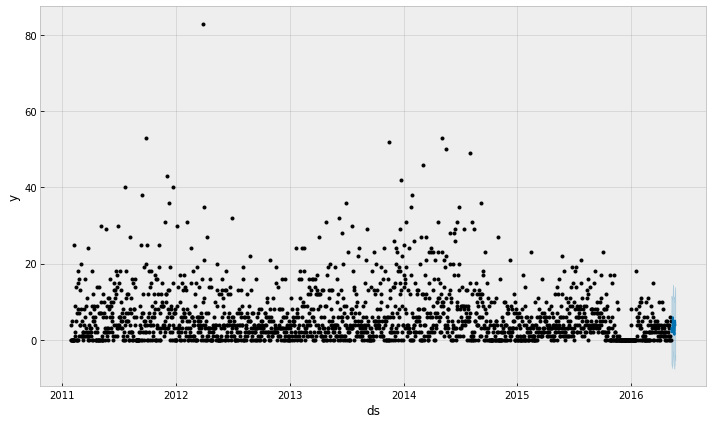

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk   y  sell_price
0     2011-01-29     d_1     11101   5         NaN
1     2011-01-30     d_2     11101   1         NaN
2     2011-01-31     d_3     11101   3         NaN
3     2011-02-01     d_4     11101   0         NaN
4     2011-02-02     d_5     11101  15         NaN
...          ...     ...       ...  ..         ...
1922  2016-05-04  d_1923     11614   0        8.38
1923  2016-05-05  d_1924     11614   5        8.38
1924  2016-05-06  d_1925     11614   3        8.38
1925  2016-05-07  d_1926     11615   4        8.38
1926  2016-05-08  d_1927     11615   5        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:55:23 - cmdstanpy - INFO - Chain [1] start processing
21:55:23 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29  7.672779   -2.991168   17.083351     7.672779     7.672779   
1    2011-01-30  7.667160   -3.364719   16.036784     7.667160     7.667160   
2    2011-01-31  7.661541   -4.981902   14.806597     7.661541     7.661541   
3    2011-02-01  7.655922   -3.665690   15.342656     7.655922     7.655922   
4    2011-02-02  7.650303   -4.213993   14.973050     7.650303     7.650303   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  6.764784   -1.641418   17.827073     6.764784     6.764784   
1937 2016-05-19  6.766944   -3.123435   17.236544     6.766944     6.766944   
1938 2016-05-20  6.769105   -2.871074   16.814089     6.769105     6.769

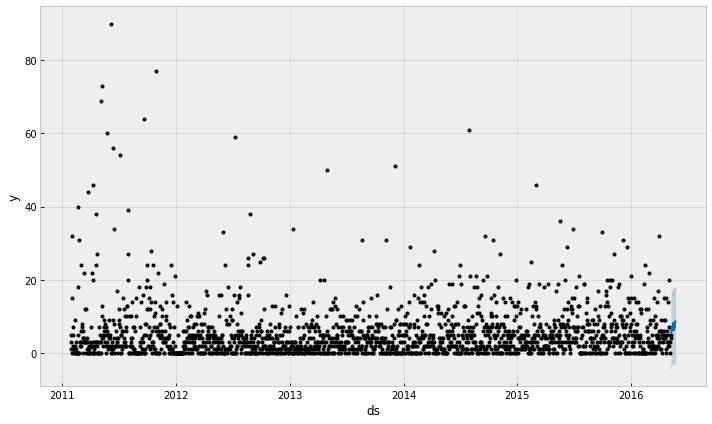

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  5        8.38
1923  2016-05-05  d_1924     11614  0        8.38
1924  2016-05-06  d_1925     11614  2        8.38
1925  2016-05-07  d_1926     11615  0        8.38
1926  2016-05-08  d_1927     11615  1        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:55:25 - cmdstanpy - INFO - Chain [1] start processing
21:55:25 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29 -0.171387   -1.395023    1.948618    -0.171387    -0.171387   
1    2011-01-30 -0.167787   -1.236598    2.195859    -0.167787    -0.167787   
2    2011-01-31 -0.164188   -2.059578    1.313344    -0.164188    -0.164188   
3    2011-02-01 -0.160589   -2.465894    1.184140    -0.160589    -0.160589   
4    2011-02-02 -0.156990   -2.153221    1.214399    -0.156990    -0.156990   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  0.994297   -1.265512    2.212456     0.994297     0.994297   
1937 2016-05-19  0.994051   -1.078699    2.391435     0.994051     0.994051   
1938 2016-05-20  0.993805   -0.971181    2.488664     0.993805     0.993

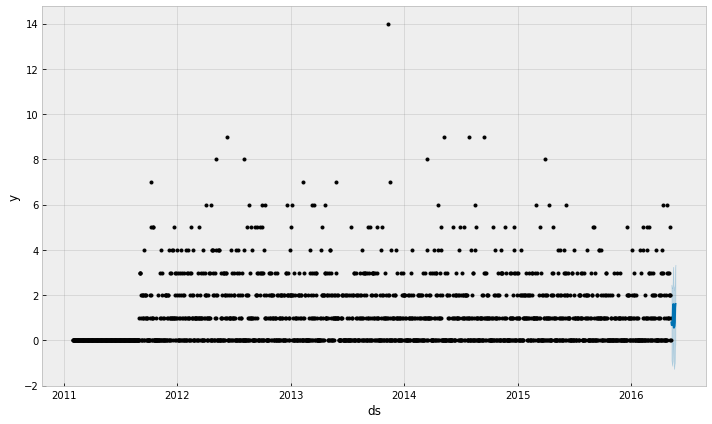

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  0        8.38
1923  2016-05-05  d_1924     11614  0        8.38
1924  2016-05-06  d_1925     11614  0        8.38
1925  2016-05-07  d_1926     11615  0        8.38
1926  2016-05-08  d_1927     11615  0        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:55:27 - cmdstanpy - INFO - Chain [1] start processing
21:55:28 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29 -0.030714   -0.319078    0.285864    -0.030714    -0.030714   
1    2011-01-30 -0.030495   -0.310270    0.293920    -0.030495    -0.030495   
2    2011-01-31 -0.030275   -0.348646    0.253813    -0.030275    -0.030275   
3    2011-02-01 -0.030056   -0.343808    0.245074    -0.030056    -0.030056   
4    2011-02-02 -0.029836   -0.314405    0.248581    -0.029836    -0.029836   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  0.063833   -0.247735    0.355169     0.063833     0.063833   
1937 2016-05-19  0.063753   -0.256314    0.326430     0.063753     0.063753   
1938 2016-05-20  0.063673   -0.200054    0.367036     0.063673     0.063

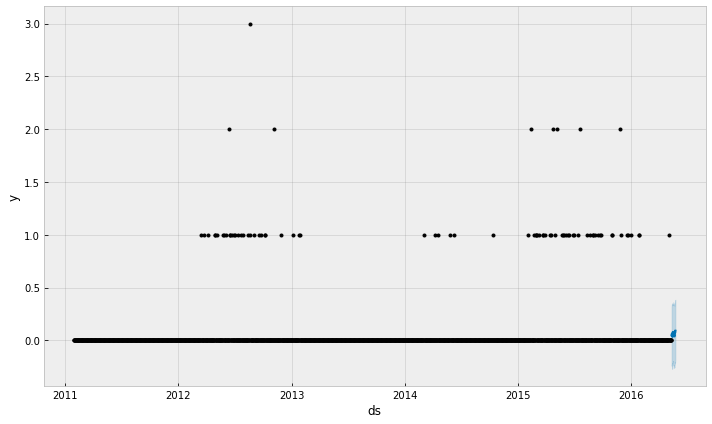

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk   y  sell_price
0     2011-01-29     d_1     11101   0         NaN
1     2011-01-30     d_2     11101   0         NaN
2     2011-01-31     d_3     11101   0         NaN
3     2011-02-01     d_4     11101   0         NaN
4     2011-02-02     d_5     11101   0         NaN
...          ...     ...       ...  ..         ...
1922  2016-05-04  d_1923     11614   1        8.38
1923  2016-05-05  d_1924     11614   7        8.38
1924  2016-05-06  d_1925     11614   5        8.38
1925  2016-05-07  d_1926     11615  10        8.38
1926  2016-05-08  d_1927     11615   6        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:55:30 - cmdstanpy - INFO - Chain [1] start processing
21:55:30 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29 -0.514228   -9.130083    8.263427    -0.514228    -0.514228   
1    2011-01-30 -0.512332   -9.624040    6.852848    -0.512332    -0.512332   
2    2011-01-31 -0.510435   -9.714989    7.153054    -0.510435    -0.510435   
3    2011-02-01 -0.508538  -10.674043    7.290810    -0.508538    -0.508538   
4    2011-02-02 -0.506641  -10.280981    6.664596    -0.506641    -0.506641   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  6.797910   -3.029588   13.983614     6.797910     6.797910   
1937 2016-05-19  6.796152   -1.679055   15.133435     6.796152     6.796152   
1938 2016-05-20  6.794395   -1.223515   16.230360     6.794395     6.794

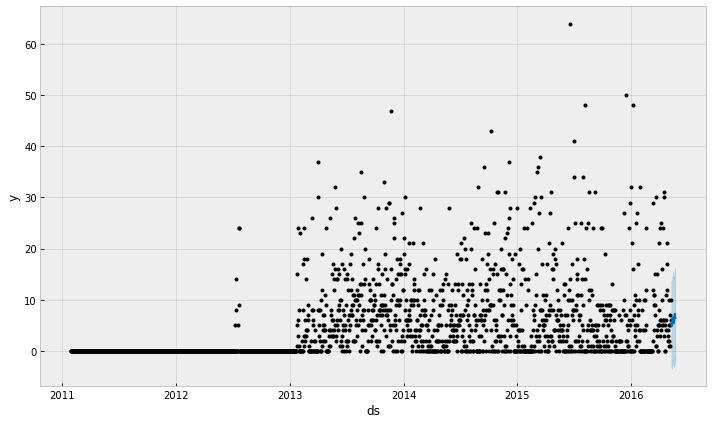

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  0        8.38
1923  2016-05-05  d_1924     11614  0        8.38
1924  2016-05-06  d_1925     11614  0        8.38
1925  2016-05-07  d_1926     11615  0        8.38
1926  2016-05-08  d_1927     11615  0        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:55:33 - cmdstanpy - INFO - Chain [1] start processing
21:55:33 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29  0.485164   -0.258206    1.285218     0.485164     0.485164   
1    2011-01-30  0.484933   -0.372632    1.184092     0.484933     0.484933   
2    2011-01-31  0.484702   -0.471033    1.084274     0.484702     0.484702   
3    2011-02-01  0.484472   -0.344994    1.130788     0.484472     0.484472   
4    2011-02-02  0.484241   -0.451229    1.119800     0.484241     0.484241   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  0.274460   -0.505695    1.059921     0.274460     0.274460   
1937 2016-05-19  0.274475   -0.528321    0.986246     0.274475     0.274475   
1938 2016-05-20  0.274491   -0.523049    0.997719     0.274491     0.274

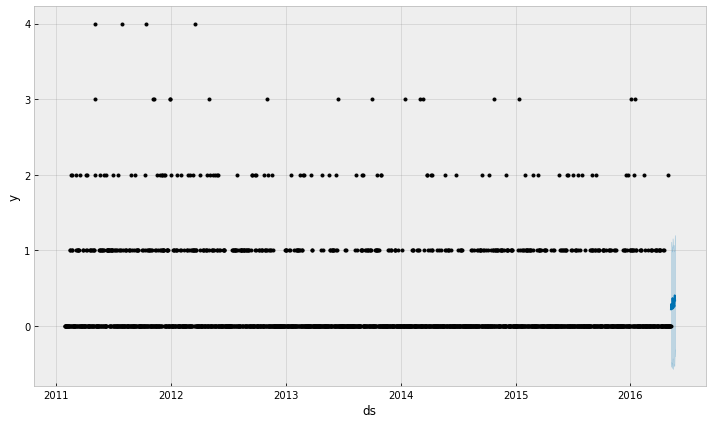

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  1        8.38
1923  2016-05-05  d_1924     11614  2        8.38
1924  2016-05-06  d_1925     11614  0        8.38
1925  2016-05-07  d_1926     11615  2        8.38
1926  2016-05-08  d_1927     11615  0        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:55:35 - cmdstanpy - INFO - Chain [1] start processing
21:55:35 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29  1.256827   -0.107052    2.408129     1.256827     1.256827   
1    2011-01-30  1.255090   -0.167601    2.442026     1.255090     1.255090   
2    2011-01-31  1.253354   -0.448836    2.194039     1.253354     1.253354   
3    2011-02-01  1.251617   -0.321342    2.197460     1.251617     1.251617   
4    2011-02-02  1.249881   -0.227838    2.213009     1.249881     1.249881   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  0.914148   -0.048232    2.476383     0.914148     0.914148   
1937 2016-05-19  0.914446   -0.100424    2.406587     0.914446     0.914446   
1938 2016-05-20  0.914745    0.078720    2.637828     0.914745     0.914

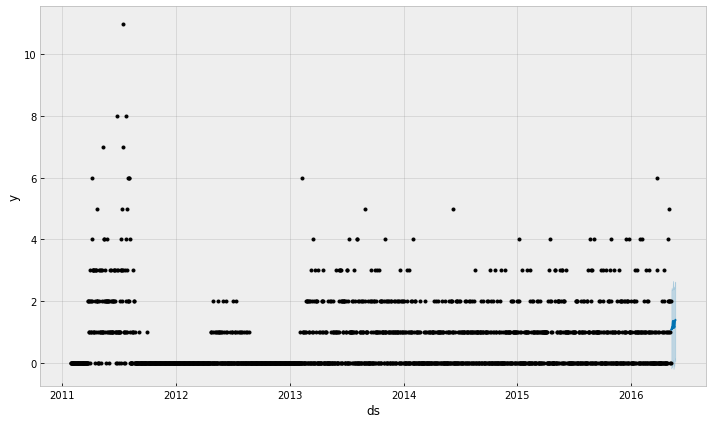

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  2         NaN
1     2011-01-30     d_2     11101  1         NaN
2     2011-01-31     d_3     11101  1         NaN
3     2011-02-01     d_4     11101  1         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  0        8.38
1923  2016-05-05  d_1924     11614  0        8.38
1924  2016-05-06  d_1925     11614  0        8.38
1925  2016-05-07  d_1926     11615  0        8.38
1926  2016-05-08  d_1927     11615  0        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:55:37 - cmdstanpy - INFO - Chain [1] start processing
21:55:38 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29  0.689415    0.141820    1.654539     0.689415     0.689415   
1    2011-01-30  0.688553    0.058777    1.714407     0.688553     0.688553   
2    2011-01-31  0.687691    0.001493    1.472743     0.687691     0.687691   
3    2011-02-01  0.686829   -0.171457    1.398770     0.686829     0.686829   
4    2011-02-02  0.685967   -0.156780    1.424668     0.685967     0.685967   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  0.220929   -0.632009    0.898396     0.220929     0.220929   
1937 2016-05-19  0.220859   -0.642566    0.869653     0.220859     0.220859   
1938 2016-05-20  0.220789   -0.472351    1.057791     0.220789     0.220

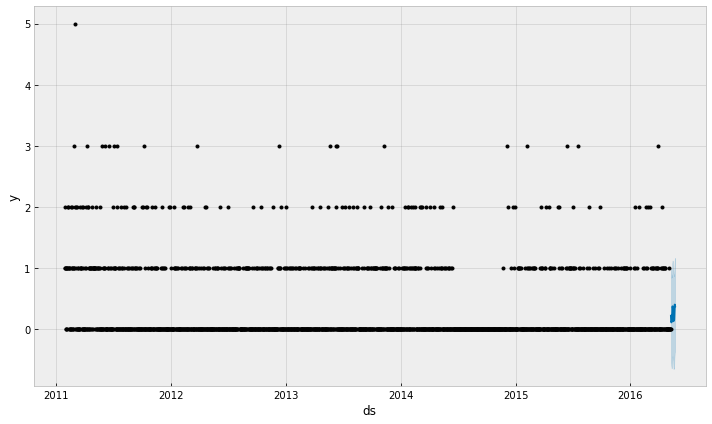

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  2         NaN
1     2011-01-30     d_2     11101  1         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  2         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  1        8.38
1923  2016-05-05  d_1924     11614  0        8.38
1924  2016-05-06  d_1925     11614  4        8.38
1925  2016-05-07  d_1926     11615  2        8.38
1926  2016-05-08  d_1927     11615  0        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:55:40 - cmdstanpy - INFO - Chain [1] start processing
21:55:40 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29  1.704464    0.139302    3.260401     1.704464     1.704464   
1    2011-01-30  1.704085    0.017177    2.977281     1.704085     1.704085   
2    2011-01-31  1.703706   -0.323750    2.747961     1.703706     1.703706   
3    2011-02-01  1.703328   -0.697509    2.457062     1.703328     1.703328   
4    2011-02-02  1.702949   -0.611210    2.574092     1.702949     1.702949   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  1.381645   -0.437229    2.410752     1.381645     1.381645   
1937 2016-05-19  1.383343   -0.746368    2.505309     1.383343     1.383343   
1938 2016-05-20  1.385042   -0.397284    2.702588     1.385042     1.385

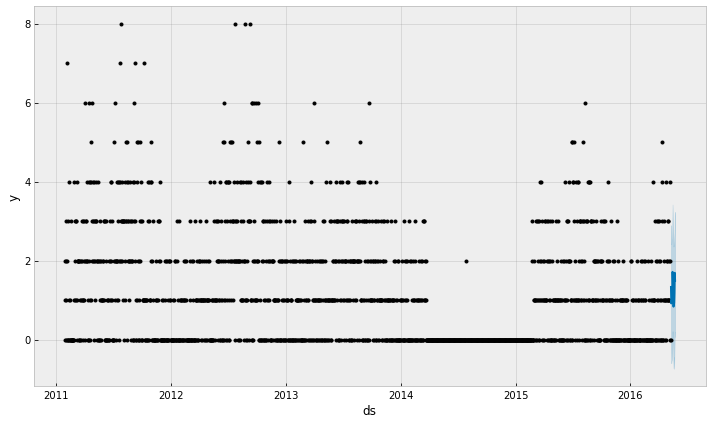

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  0        8.38
1923  2016-05-05  d_1924     11614  0        8.38
1924  2016-05-06  d_1925     11614  0        8.38
1925  2016-05-07  d_1926     11615  1        8.38
1926  2016-05-08  d_1927     11615  0        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:55:42 - cmdstanpy - INFO - Chain [1] start processing
21:55:42 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29 -0.071604   -0.571350    0.881727    -0.071604    -0.071604   
1    2011-01-30 -0.071173   -0.741377    0.778001    -0.071173    -0.071173   
2    2011-01-31 -0.070742   -0.761466    0.693557    -0.070742    -0.070742   
3    2011-02-01 -0.070311   -0.826658    0.674978    -0.070311    -0.070311   
4    2011-02-02 -0.069880   -0.791191    0.675508    -0.069880    -0.069880   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  0.143242   -0.736667    0.809918     0.143242     0.143242   
1937 2016-05-19  0.142863   -0.738512    0.780077     0.142863     0.142863   
1938 2016-05-20  0.142484   -0.577361    0.822499     0.142484     0.142

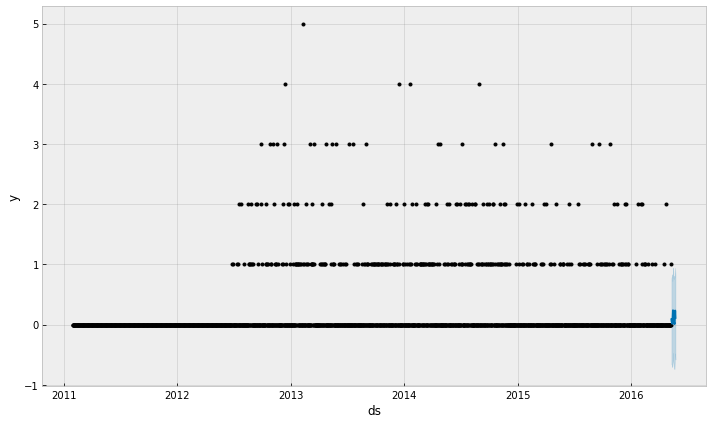

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  1        8.38
1923  2016-05-05  d_1924     11614  0        8.38
1924  2016-05-06  d_1925     11614  0        8.38
1925  2016-05-07  d_1926     11615  1        8.38
1926  2016-05-08  d_1927     11615  2        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:55:45 - cmdstanpy - INFO - Chain [1] start processing
21:55:45 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29  0.114887   -0.955836    1.348402     0.114887     0.114887   
1    2011-01-30  0.115672   -0.624549    1.598606     0.115672     0.115672   
2    2011-01-31  0.116456   -1.267597    1.023156     0.116456     0.116456   
3    2011-02-01  0.117241   -1.144489    1.215814     0.117241     0.117241   
4    2011-02-02  0.118026   -1.024047    1.209456     0.118026     0.118026   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  0.683555   -0.330534    1.999739     0.683555     0.683555   
1937 2016-05-19  0.683744   -0.342740    1.964740     0.683744     0.683744   
1938 2016-05-20  0.683932   -0.283612    2.003133     0.683932     0.683

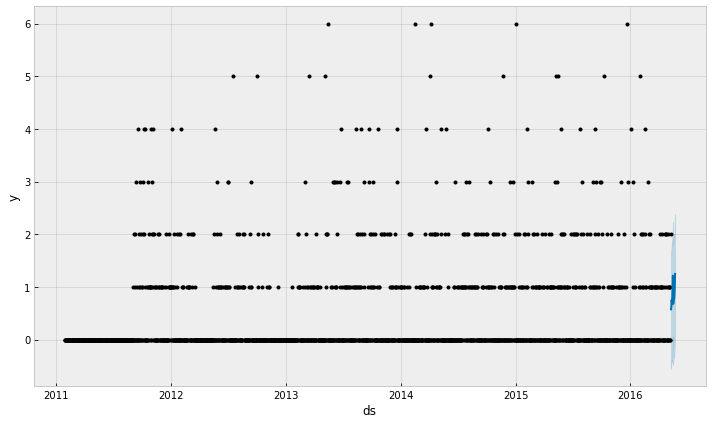

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  0        8.38
1923  2016-05-05  d_1924     11614  0        8.38
1924  2016-05-06  d_1925     11614  0        8.38
1925  2016-05-07  d_1926     11615  0        8.38
1926  2016-05-08  d_1927     11615  1        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:55:47 - cmdstanpy - INFO - Chain [1] start processing
21:55:48 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29 -0.007743   -0.143786    0.148851    -0.007743    -0.007743   
1    2011-01-30 -0.007723   -0.157998    0.154723    -0.007723    -0.007723   
2    2011-01-31 -0.007704   -0.151690    0.151939    -0.007704    -0.007704   
3    2011-02-01 -0.007684   -0.158250    0.142835    -0.007684    -0.007684   
4    2011-02-02 -0.007665   -0.152484    0.139583    -0.007665    -0.007665   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  0.138913   -0.007596    0.297695     0.138913     0.138913   
1937 2016-05-19  0.139323    0.024069    0.310940     0.139323     0.139323   
1938 2016-05-20  0.139733   -0.004951    0.292362     0.139733     0.139

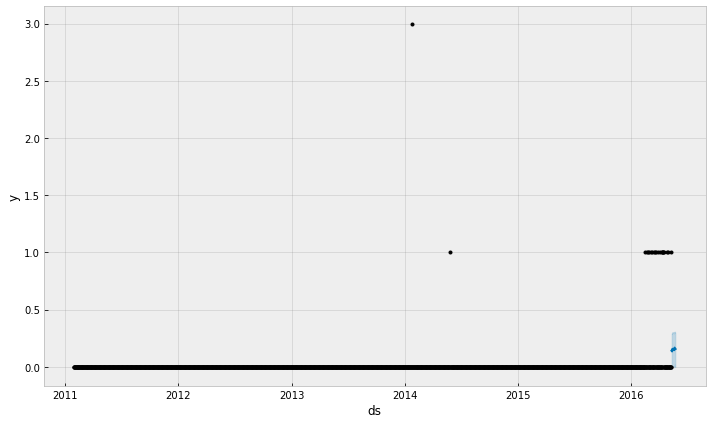

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  0        8.38
1923  2016-05-05  d_1924     11614  1        8.38
1924  2016-05-06  d_1925     11614  0        8.38
1925  2016-05-07  d_1926     11615  4        8.38
1926  2016-05-08  d_1927     11615  0        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:55:50 - cmdstanpy - INFO - Chain [1] start processing
21:55:50 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29 -0.010445   -0.557303    0.786138    -0.010445    -0.010445   
1    2011-01-30 -0.010428   -0.678285    0.618147    -0.010428    -0.010428   
2    2011-01-31 -0.010410   -0.766014    0.510793    -0.010410    -0.010410   
3    2011-02-01 -0.010393   -0.727056    0.581138    -0.010393    -0.010393   
4    2011-02-02 -0.010376   -0.763877    0.476736    -0.010376    -0.010376   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  0.606500    0.037885    1.344947     0.606500     0.606500   
1937 2016-05-19  0.606927    0.012391    1.338579     0.606927     0.606927   
1938 2016-05-20  0.607354    0.074962    1.366683     0.607354     0.607

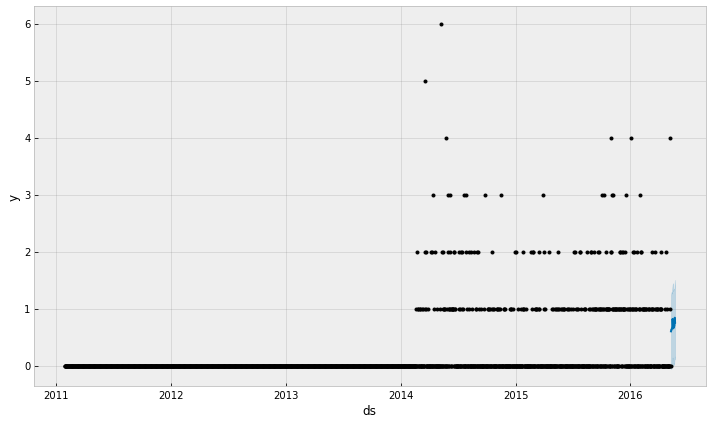

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  1         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  2        8.38
1923  2016-05-05  d_1924     11614  0        8.38
1924  2016-05-06  d_1925     11614  2        8.38
1925  2016-05-07  d_1926     11615  4        8.38
1926  2016-05-08  d_1927     11615  0        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:55:52 - cmdstanpy - INFO - Chain [1] start processing
21:55:52 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29  1.325095    0.208161    2.572541     1.325095     1.325095   
1    2011-01-30  1.324329    0.024363    2.371569     1.324329     1.324329   
2    2011-01-31  1.323564   -0.007488    2.272620     1.323564     1.323564   
3    2011-02-01  1.322798   -0.121292    2.225982     1.322798     1.322798   
4    2011-02-02  1.322032   -0.073409    2.240052     1.322032     1.322032   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  0.938089   -0.257579    2.055218     0.938089     0.938089   
1937 2016-05-19  0.939690   -0.172671    2.162824     0.939690     0.939690   
1938 2016-05-20  0.941291    0.095968    2.518544     0.941291     0.941

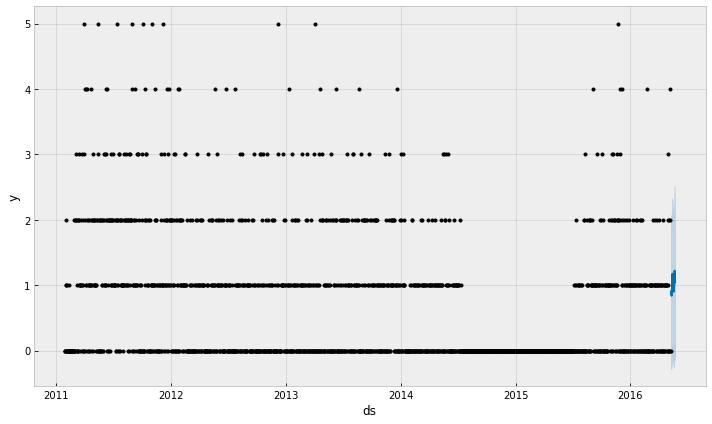

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  2         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  3         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  3        8.38
1923  2016-05-05  d_1924     11614  1        8.38
1924  2016-05-06  d_1925     11614  0        8.38
1925  2016-05-07  d_1926     11615  3        8.38
1926  2016-05-08  d_1927     11615  2        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:55:54 - cmdstanpy - INFO - Chain [1] start processing
21:55:54 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29  1.529143    0.049981    3.621554     1.529143     1.529143   
1    2011-01-30  1.528778   -0.077600    3.585144     1.528778     1.528778   
2    2011-01-31  1.528414   -0.579058    2.964586     1.528414     1.528414   
3    2011-02-01  1.528049   -0.808836    2.899541     1.528049     1.528049   
4    2011-02-02  1.527685   -0.682014    2.929531     1.527685     1.527685   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  2.131026   -0.227260    3.393817     2.131026     2.131026   
1937 2016-05-19  2.132229   -0.142581    3.439531     2.132229     2.132229   
1938 2016-05-20  2.133433    0.292214    3.942481     2.133433     2.133

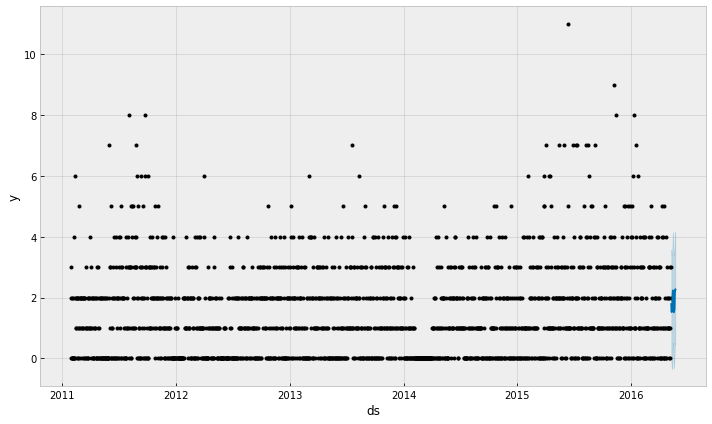

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk   y  sell_price
0     2011-01-29     d_1     11101   0         NaN
1     2011-01-30     d_2     11101   0         NaN
2     2011-01-31     d_3     11101   0         NaN
3     2011-02-01     d_4     11101   0         NaN
4     2011-02-02     d_5     11101   0         NaN
...          ...     ...       ...  ..         ...
1922  2016-05-04  d_1923     11614   9        8.38
1923  2016-05-05  d_1924     11614   3        8.38
1924  2016-05-06  d_1925     11614  13        8.38
1925  2016-05-07  d_1926     11615   1        8.38
1926  2016-05-08  d_1927     11615   9        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:55:56 - cmdstanpy - INFO - Chain [1] start processing
21:55:57 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29 -0.350655   -3.870632    6.232361    -0.350655    -0.350655   
1    2011-01-30 -0.349232   -5.089379    5.550516    -0.349232    -0.349232   
2    2011-01-31 -0.347809   -6.423393    3.869368    -0.347809    -0.347809   
3    2011-02-01 -0.346386   -6.707549    3.631557    -0.346386    -0.346386   
4    2011-02-02 -0.344962   -6.847887    3.489927    -0.344962    -0.344962   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  7.182404    1.442492   11.382362     7.182404     7.182404   
1937 2016-05-19  7.190229    1.120593   11.425570     7.190229     7.190229   
1938 2016-05-20  7.198053    2.531033   12.587391     7.198053     7.198

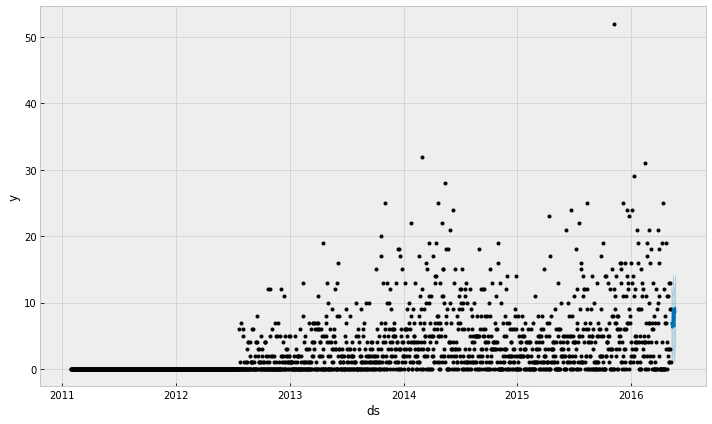

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  0        8.38
1923  2016-05-05  d_1924     11614  0        8.38
1924  2016-05-06  d_1925     11614  0        8.38
1925  2016-05-07  d_1926     11615  0        8.38
1926  2016-05-08  d_1927     11615  0        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:55:59 - cmdstanpy - INFO - Chain [1] start processing
21:55:59 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29  0.299244   -0.461294    1.111466     0.299244     0.299244   
1    2011-01-30  0.299395   -0.412946    1.171168     0.299395     0.299395   
2    2011-01-31  0.299546   -0.642264    0.904693     0.299546     0.299546   
3    2011-02-01  0.299698   -0.587660    1.010161     0.299698     0.299698   
4    2011-02-02  0.299849   -0.643076    0.913337     0.299849     0.299849   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  0.231615   -0.717746    0.867787     0.231615     0.231615   
1937 2016-05-19  0.231413   -0.737093    0.863593     0.231413     0.231413   
1938 2016-05-20  0.231212   -0.656775    0.883032     0.231212     0.231

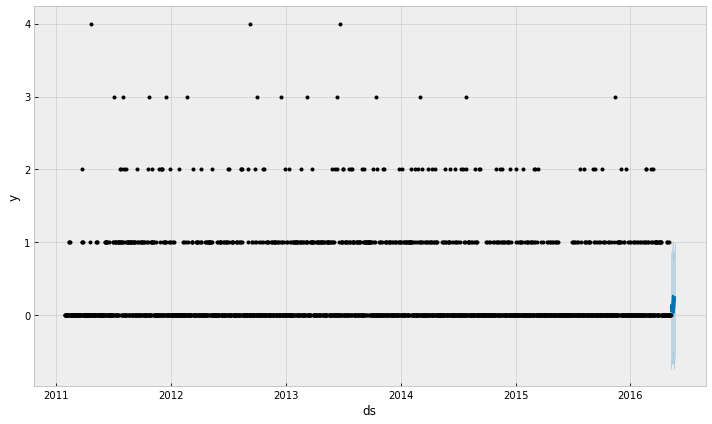

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk   y  sell_price
0     2011-01-29     d_1     11101   9         NaN
1     2011-01-30     d_2     11101   0         NaN
2     2011-01-31     d_3     11101   5         NaN
3     2011-02-01     d_4     11101  16         NaN
4     2011-02-02     d_5     11101   8         NaN
...          ...     ...       ...  ..         ...
1922  2016-05-04  d_1923     11614   6        8.38
1923  2016-05-05  d_1924     11614   2        8.38
1924  2016-05-06  d_1925     11614   0        8.38
1925  2016-05-07  d_1926     11615   5        8.38
1926  2016-05-08  d_1927     11615   8        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:56:01 - cmdstanpy - INFO - Chain [1] start processing
21:56:01 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29  10.124784    1.903756   23.294548    10.124784    10.124784   
1    2011-01-30  10.119338   -0.793501   19.615237    10.119338    10.119338   
2    2011-01-31  10.113892    0.427218   20.754033    10.113892    10.113892   
3    2011-02-01  10.108445   -0.108941   20.962687    10.108445    10.108445   
4    2011-02-02  10.102999    1.827615   21.884860    10.102999    10.102999   
...         ...        ...         ...         ...          ...          ...   
1936 2016-05-18   5.068675   -5.965909   15.072982     5.068675     5.068675   
1937 2016-05-19   5.072722   -5.167376   15.770372     5.072722     5.072722   
1938 2016-05-20   5.076770   -5.270387   15.063911     5.076770

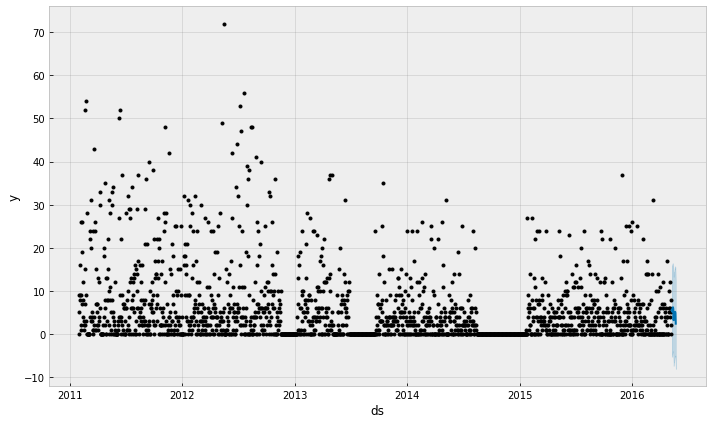

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  0        8.38
1923  2016-05-05  d_1924     11614  0        8.38
1924  2016-05-06  d_1925     11614  0        8.38
1925  2016-05-07  d_1926     11615  0        8.38
1926  2016-05-08  d_1927     11615  2        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:56:03 - cmdstanpy - INFO - Chain [1] start processing
21:56:04 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29 -0.019620   -0.507297    0.619959    -0.019620    -0.019620   
1    2011-01-30 -0.019573   -0.430075    0.670199    -0.019573    -0.019573   
2    2011-01-31 -0.019527   -0.546521    0.546848    -0.019527    -0.019527   
3    2011-02-01 -0.019480   -0.509312    0.606088    -0.019480    -0.019480   
4    2011-02-02 -0.019434   -0.486311    0.612401    -0.019434    -0.019434   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  0.262895   -0.359926    0.802710     0.262895     0.262895   
1937 2016-05-19  0.262701   -0.313842    0.798168     0.262701     0.262701   
1938 2016-05-20  0.262506   -0.266470    0.805881     0.262506     0.262

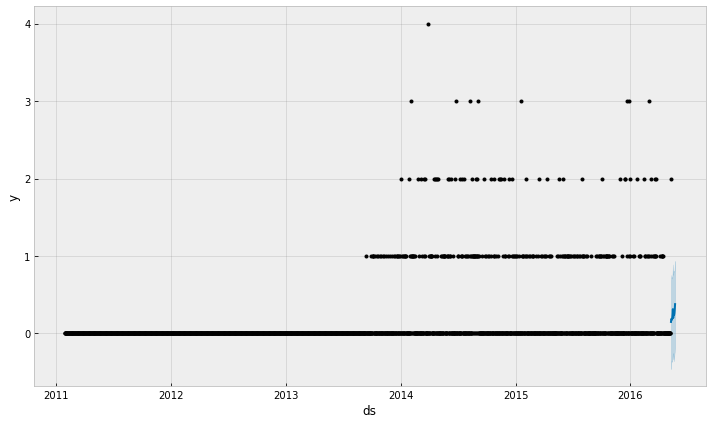

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  2        8.38
1923  2016-05-05  d_1924     11614  2        8.38
1924  2016-05-06  d_1925     11614  0        8.38
1925  2016-05-07  d_1926     11615  0        8.38
1926  2016-05-08  d_1927     11615  0        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:56:06 - cmdstanpy - INFO - Chain [1] start processing
21:56:06 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29  0.557561   -0.642268    1.598944     0.557561     0.557561   
1    2011-01-30  0.557389   -0.532796    1.580297     0.557389     0.557389   
2    2011-01-31  0.557217   -0.614645    1.411164     0.557217     0.557217   
3    2011-02-01  0.557045   -0.673175    1.364805     0.557045     0.557045   
4    2011-02-02  0.556873   -0.746004    1.379548     0.556873     0.556873   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  0.794150   -0.386374    1.727737     0.794150     0.794150   
1937 2016-05-19  0.794601   -0.290308    1.830909     0.794601     0.794601   
1938 2016-05-20  0.795053   -0.296259    1.794668     0.795053     0.795

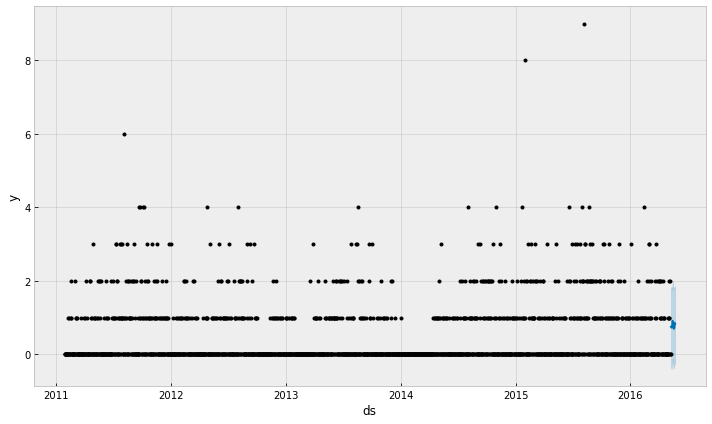

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  0        8.38
1923  2016-05-05  d_1924     11614  1        8.38
1924  2016-05-06  d_1925     11614  0        8.38
1925  2016-05-07  d_1926     11615  0        8.38
1926  2016-05-08  d_1927     11615  0        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:56:08 - cmdstanpy - INFO - Chain [1] start processing
21:56:08 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29  0.053820   -0.413930    0.562428     0.053820     0.053820   
1    2011-01-30  0.054311   -0.475592    0.535623     0.054311     0.054311   
2    2011-01-31  0.054802   -0.498732    0.538133     0.054802     0.054802   
3    2011-02-01  0.055293   -0.565064    0.460143     0.055293     0.055293   
4    2011-02-02  0.055784   -0.598693    0.456440     0.055784     0.055784   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  0.159443   -0.432461    0.622748     0.159443     0.159443   
1937 2016-05-19  0.159497   -0.355101    0.682162     0.159497     0.159497   
1938 2016-05-20  0.159550   -0.294659    0.724164     0.159550     0.159

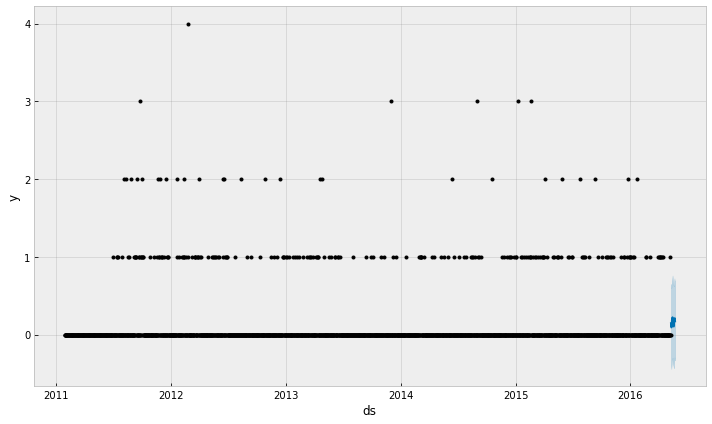

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  2         NaN
1     2011-01-30     d_2     11101  1         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  0        8.38
1923  2016-05-05  d_1924     11614  3        8.38
1924  2016-05-06  d_1925     11614  1        8.38
1925  2016-05-07  d_1926     11615  4        8.38
1926  2016-05-08  d_1927     11615  0        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:56:10 - cmdstanpy - INFO - Chain [1] start processing
21:56:10 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29  1.036597   -0.419719    2.526045     1.036597     1.036597   
1    2011-01-30  1.035745   -0.356630    2.673829     1.035745     1.035745   
2    2011-01-31  1.034892   -0.740202    2.104785     1.034892     1.034892   
3    2011-02-01  1.034040   -0.630394    2.168430     1.034040     1.034040   
4    2011-02-02  1.033187   -0.542930    2.427990     1.033187     1.033187   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  0.934150   -0.529647    2.496510     0.934150     0.934150   
1937 2016-05-19  0.934738   -0.612702    2.159066     0.934738     0.934738   
1938 2016-05-20  0.935326   -0.531743    2.385270     0.935326     0.935

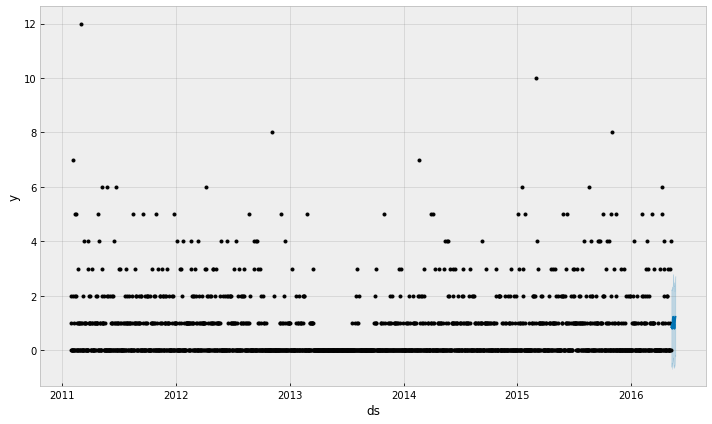

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  0        8.38
1923  2016-05-05  d_1924     11614  0        8.38
1924  2016-05-06  d_1925     11614  0        8.38
1925  2016-05-07  d_1926     11615  3        8.38
1926  2016-05-08  d_1927     11615  1        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:56:12 - cmdstanpy - INFO - Chain [1] start processing
21:56:13 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29 -0.204935   -1.321228    0.989628    -0.204935    -0.204935   
1    2011-01-30 -0.203261   -1.172678    1.121932    -0.203261    -0.203261   
2    2011-01-31 -0.201587   -1.355128    0.878659    -0.201587    -0.201587   
3    2011-02-01 -0.199913   -1.708187    0.576498    -0.199913    -0.199913   
4    2011-02-02 -0.198239   -1.529072    0.759696    -0.198239    -0.198239   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  0.705906   -0.648127    1.705894     0.705906     0.705906   
1937 2016-05-19  0.705580   -0.602491    1.622355     0.705580     0.705580   
1938 2016-05-20  0.705255   -0.601539    1.694870     0.705255     0.705

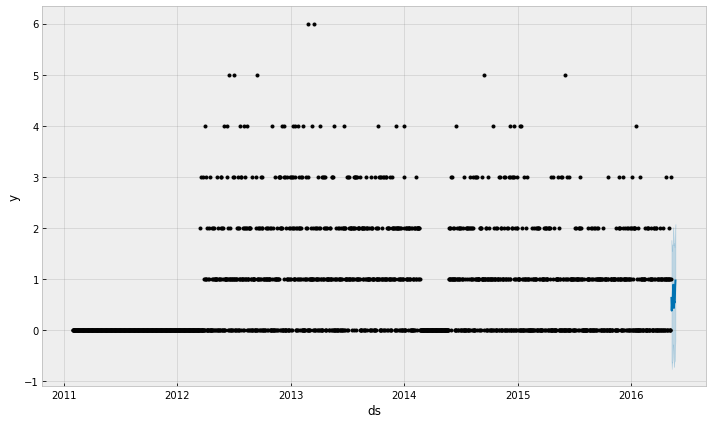

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  1         NaN
2     2011-01-31     d_3     11101  1         NaN
3     2011-02-01     d_4     11101  1         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  2        8.38
1923  2016-05-05  d_1924     11614  0        8.38
1924  2016-05-06  d_1925     11614  0        8.38
1925  2016-05-07  d_1926     11615  1        8.38
1926  2016-05-08  d_1927     11615  3        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:56:15 - cmdstanpy - INFO - Chain [1] start processing
21:56:15 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29  0.492692   -0.251676    1.351005     0.492692     0.492692   
1    2011-01-30  0.492500   -0.125576    1.509740     0.492500     0.492500   
2    2011-01-31  0.492308   -0.319747    1.248992     0.492308     0.492308   
3    2011-02-01  0.492115   -0.542806    1.139269     0.492115     0.492115   
4    2011-02-02  0.491923   -0.370130    1.309590     0.491923     0.491923   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  0.438800   -0.489671    1.236874     0.438800     0.438800   
1937 2016-05-19  0.438900   -0.542966    1.109242     0.438900     0.438900   
1938 2016-05-20  0.439000   -0.475101    1.215183     0.439000     0.439

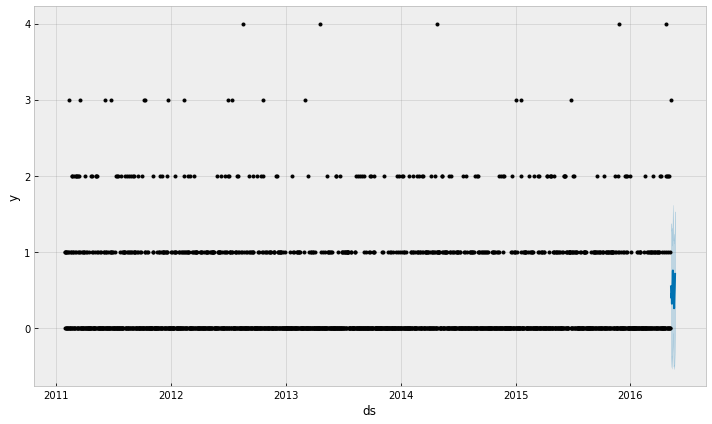

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  0        8.38
1923  2016-05-05  d_1924     11614  0        8.38
1924  2016-05-06  d_1925     11614  0        8.38
1925  2016-05-07  d_1926     11615  0        8.38
1926  2016-05-08  d_1927     11615  0        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:56:17 - cmdstanpy - INFO - Chain [1] start processing
21:56:18 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29 -0.036366   -0.411338    0.481939    -0.036366    -0.036366   
1    2011-01-30 -0.036173   -0.466693    0.427156    -0.036173    -0.036173   
2    2011-01-31 -0.035980   -0.431052    0.433260    -0.035980    -0.035980   
3    2011-02-01 -0.035786   -0.463536    0.402866    -0.035786    -0.035786   
4    2011-02-02 -0.035593   -0.448304    0.431019    -0.035593    -0.035593   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  0.131968   -0.336874    0.539755     0.131968     0.131968   
1937 2016-05-19  0.131934   -0.330359    0.539239     0.131934     0.131934   
1938 2016-05-20  0.131899   -0.321159    0.568025     0.131899     0.131

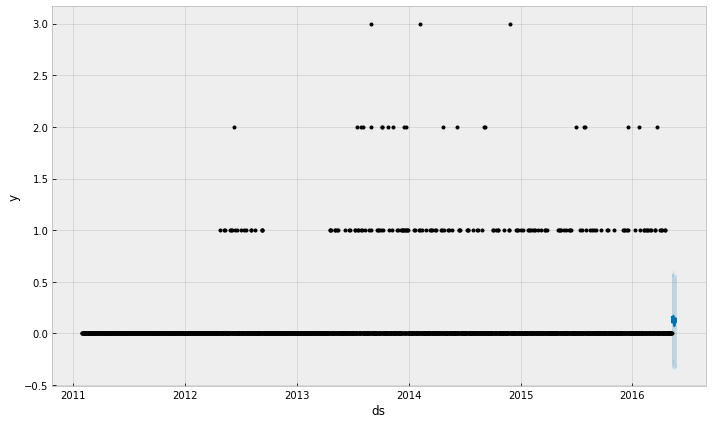

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  1        8.38
1923  2016-05-05  d_1924     11614  0        8.38
1924  2016-05-06  d_1925     11614  1        8.38
1925  2016-05-07  d_1926     11615  1        8.38
1926  2016-05-08  d_1927     11615  1        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:56:20 - cmdstanpy - INFO - Chain [1] start processing
21:56:20 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29 -0.130337   -0.963333    1.145934    -0.130337    -0.130337   
1    2011-01-30 -0.129566   -0.901407    1.221384    -0.129566    -0.129566   
2    2011-01-31 -0.128796   -0.970669    1.035470    -0.128796    -0.128796   
3    2011-02-01 -0.128025   -1.155813    0.979686    -0.128025    -0.128025   
4    2011-02-02 -0.127254   -1.260429    0.781678    -0.127254    -0.127254   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  1.106651   -0.304733    1.850101     1.106651     1.106651   
1937 2016-05-19  1.108139   -0.292834    1.757410     1.108139     1.108139   
1938 2016-05-20  1.109627   -0.217395    1.866410     1.109627     1.109

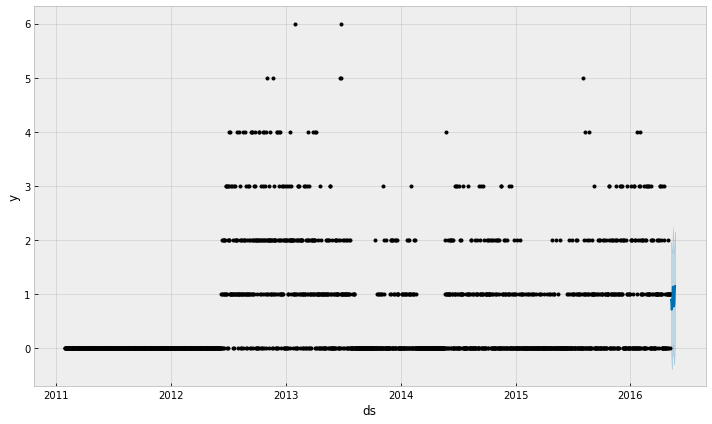

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  0        8.38
1923  2016-05-05  d_1924     11614  0        8.38
1924  2016-05-06  d_1925     11614  0        8.38
1925  2016-05-07  d_1926     11615  0        8.38
1926  2016-05-08  d_1927     11615  0        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:56:22 - cmdstanpy - INFO - Chain [1] start processing
21:56:22 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29  0.157332   -0.609899    0.889480     0.157332     0.157332   
1    2011-01-30  0.157762   -0.533035    0.918986     0.157762     0.157762   
2    2011-01-31  0.158193   -0.755271    0.730431     0.158193     0.158193   
3    2011-02-01  0.158623   -0.804139    0.681085     0.158623     0.158623   
4    2011-02-02  0.159054   -0.824334    0.631941     0.159054     0.159054   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  0.216815   -0.703123    0.828688     0.216815     0.216815   
1937 2016-05-19  0.216670   -0.694131    0.761172     0.216670     0.216670   
1938 2016-05-20  0.216525   -0.718723    0.776650     0.216525     0.216

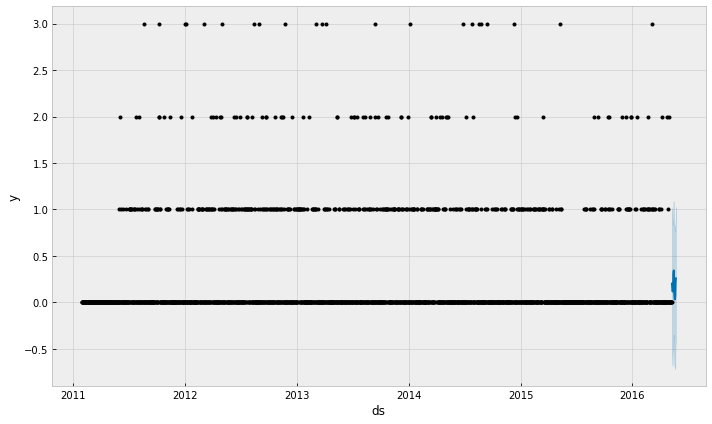

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  3        8.38
1923  2016-05-05  d_1924     11614  0        8.38
1924  2016-05-06  d_1925     11614  1        8.38
1925  2016-05-07  d_1926     11615  0        8.38
1926  2016-05-08  d_1927     11615  0        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:56:24 - cmdstanpy - INFO - Chain [1] start processing
21:56:25 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29 -0.262814   -1.065281    1.065730    -0.262814    -0.262814   
1    2011-01-30 -0.260350   -1.141565    1.078030    -0.260350    -0.260350   
2    2011-01-31 -0.257886   -0.937122    1.202524    -0.257886    -0.257886   
3    2011-02-01 -0.255422   -1.166334    1.066220    -0.255422    -0.255422   
4    2011-02-02 -0.252958   -1.063985    1.087345    -0.252958    -0.252958   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  0.391526   -0.589981    1.547820     0.391526     0.391526   
1937 2016-05-19  0.391486   -0.679629    1.380625     0.391486     0.391486   
1938 2016-05-20  0.391446   -0.457102    1.664682     0.391446     0.391

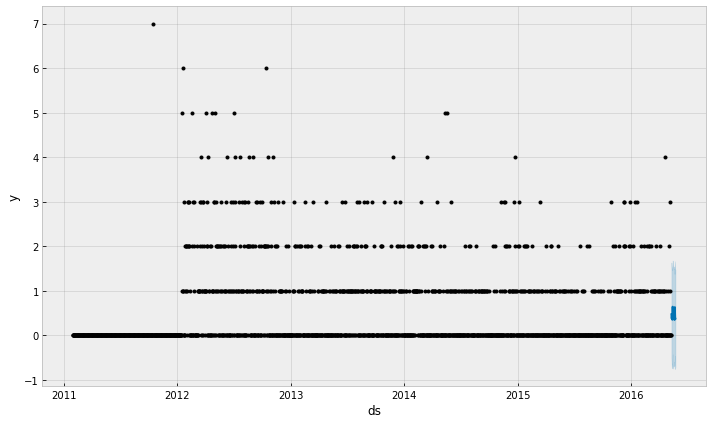

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk   y  sell_price
0     2011-01-29     d_1     11101   0         NaN
1     2011-01-30     d_2     11101   0         NaN
2     2011-01-31     d_3     11101   0         NaN
3     2011-02-01     d_4     11101   0         NaN
4     2011-02-02     d_5     11101   0         NaN
...          ...     ...       ...  ..         ...
1922  2016-05-04  d_1923     11614  11        8.38
1923  2016-05-05  d_1924     11614   0        8.38
1924  2016-05-06  d_1925     11614   0        8.38
1925  2016-05-07  d_1926     11615   7        8.38
1926  2016-05-08  d_1927     11615   0        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:56:27 - cmdstanpy - INFO - Chain [1] start processing
21:56:27 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29  4.550222   -1.497553   12.103434     4.550222     4.550222   
1    2011-01-30  4.549963   -1.464183   12.250264     4.549963     4.549963   
2    2011-01-31  4.549705   -1.857095   11.215555     4.549705     4.549705   
3    2011-02-01  4.549447   -2.215946   10.028880     4.549447     4.549447   
4    2011-02-02  4.549188   -1.481327   10.852562     4.549188     4.549188   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  2.352788   -4.056634    8.957702     2.352788     2.352788   
1937 2016-05-19  2.352998   -4.854148    8.274370     2.352998     2.352998   
1938 2016-05-20  2.353207   -3.439630    9.354091     2.353207     2.353

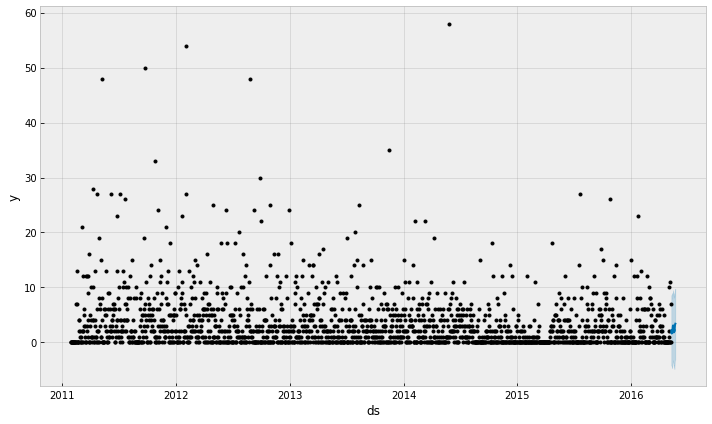

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  3         NaN
1     2011-01-30     d_2     11101  3         NaN
2     2011-01-31     d_3     11101  2         NaN
3     2011-02-01     d_4     11101  1         NaN
4     2011-02-02     d_5     11101  1         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  0        8.38
1923  2016-05-05  d_1924     11614  0        8.38
1924  2016-05-06  d_1925     11614  0        8.38
1925  2016-05-07  d_1926     11615  1        8.38
1926  2016-05-08  d_1927     11615  1        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:56:29 - cmdstanpy - INFO - Chain [1] start processing
21:56:29 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29  1.695258    0.382513    3.290515     1.695258     1.695258   
1    2011-01-30  1.694091    0.712733    3.538359     1.694091     1.694091   
2    2011-01-31  1.692924    0.430202    3.085954     1.692924     1.692924   
3    2011-02-01  1.691757    0.166545    3.091781     1.691757     1.691757   
4    2011-02-02  1.690590    0.097767    2.982455     1.690590     1.690590   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  0.430861   -1.179379    1.811706     0.430861     0.430861   
1937 2016-05-19  0.430365   -1.081864    1.799753     0.430365     0.430365   
1938 2016-05-20  0.429869   -0.973721    1.991992     0.429869     0.429

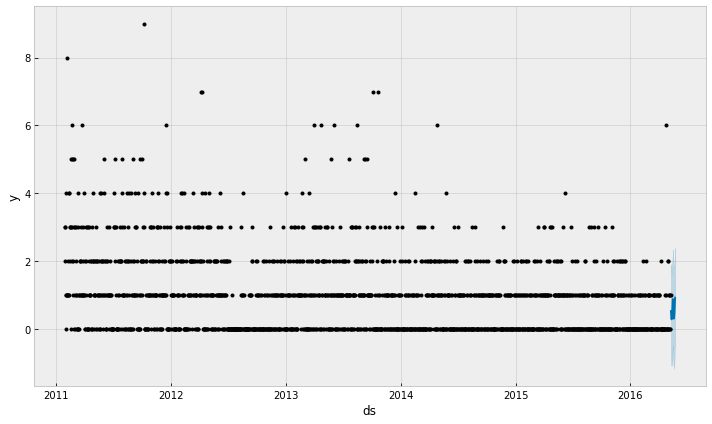

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  0        8.38
1923  2016-05-05  d_1924     11614  0        8.38
1924  2016-05-06  d_1925     11614  0        8.38
1925  2016-05-07  d_1926     11615  0        8.38
1926  2016-05-08  d_1927     11615  0        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:56:31 - cmdstanpy - INFO - Chain [1] start processing
21:56:32 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29 -0.003491   -0.444613    0.700706    -0.003491    -0.003491   
1    2011-01-30 -0.003489   -0.443053    0.676462    -0.003489    -0.003489   
2    2011-01-31 -0.003488   -0.412843    0.652196    -0.003488    -0.003488   
3    2011-02-01 -0.003487   -0.421284    0.671907    -0.003487    -0.003487   
4    2011-02-02 -0.003485   -0.399679    0.658278    -0.003485    -0.003485   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  0.418458   -0.165801    0.929335     0.418458     0.418458   
1937 2016-05-19  0.418564   -0.184130    0.932694     0.418564     0.418564   
1938 2016-05-20  0.418670   -0.130576    0.918301     0.418670     0.418

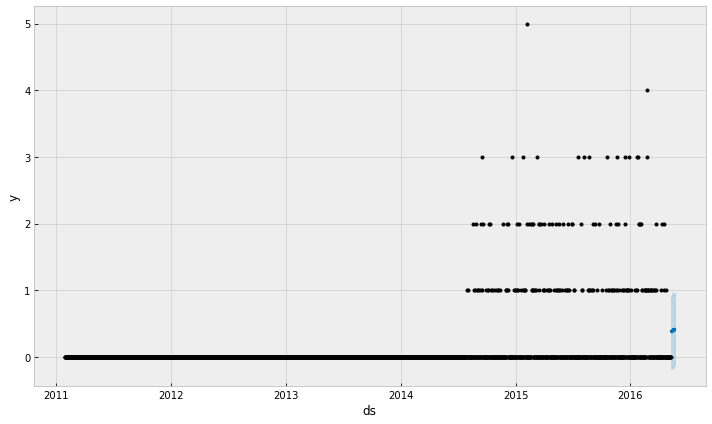

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  0        8.38
1923  2016-05-05  d_1924     11614  0        8.38
1924  2016-05-06  d_1925     11614  2        8.38
1925  2016-05-07  d_1926     11615  2        8.38
1926  2016-05-08  d_1927     11615  1        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:56:34 - cmdstanpy - INFO - Chain [1] start processing
21:56:34 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29 -0.010105   -0.510485    0.598387    -0.010105    -0.010105   
1    2011-01-30 -0.010082   -0.485039    0.580087    -0.010082    -0.010082   
2    2011-01-31 -0.010058   -0.519533    0.503736    -0.010058    -0.010058   
3    2011-02-01 -0.010034   -0.526656    0.580558    -0.010034    -0.010034   
4    2011-02-02 -0.010010   -0.592520    0.463022    -0.010010    -0.010010   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  1.058200    0.445216    1.567113     1.058200     1.058200   
1937 2016-05-19  1.059763    0.531777    1.623980     1.059763     1.059763   
1938 2016-05-20  1.061325    0.540430    1.602137     1.061325     1.061

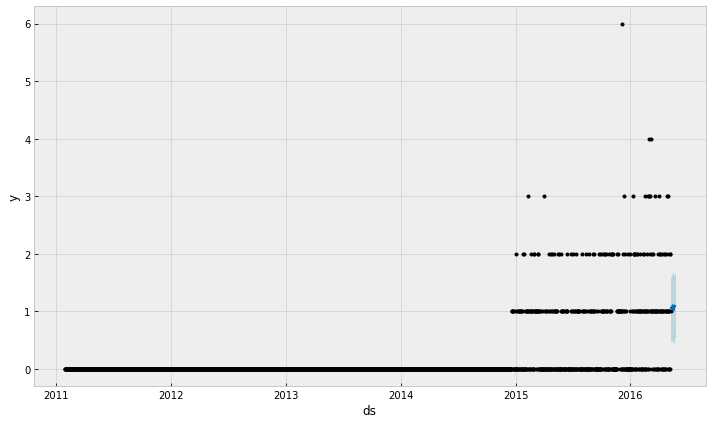

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  1         NaN
1     2011-01-30     d_2     11101  2         NaN
2     2011-01-31     d_3     11101  3         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  1         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  0        8.38
1923  2016-05-05  d_1924     11614  1        8.38
1924  2016-05-06  d_1925     11614  0        8.38
1925  2016-05-07  d_1926     11615  0        8.38
1926  2016-05-08  d_1927     11615  3        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:56:36 - cmdstanpy - INFO - Chain [1] start processing
21:56:37 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29  1.901531   -0.114730    4.964271     1.901531     1.901531   
1    2011-01-30  1.899626   -0.259934    4.464634     1.899626     1.899626   
2    2011-01-31  1.897721   -0.520069    4.341579     1.897721     1.897721   
3    2011-02-01  1.895816   -0.496767    4.404442     1.895816     1.895816   
4    2011-02-02  1.893910   -0.554052    4.025880     1.893910     1.893910   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  1.039836   -1.554591    2.982212     1.039836     1.039836   
1937 2016-05-19  1.039802   -1.471040    3.243007     1.039802     1.039802   
1938 2016-05-20  1.039768   -1.355510    3.198108     1.039768     1.039

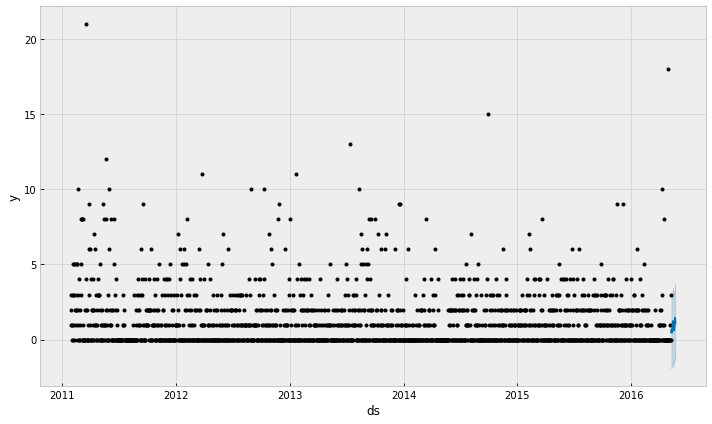

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk   y  sell_price
0     2011-01-29     d_1     11101   0         NaN
1     2011-01-30     d_2     11101   0         NaN
2     2011-01-31     d_3     11101   0         NaN
3     2011-02-01     d_4     11101   0         NaN
4     2011-02-02     d_5     11101   0         NaN
...          ...     ...       ...  ..         ...
1922  2016-05-04  d_1923     11614  33        8.38
1923  2016-05-05  d_1924     11614   9        8.38
1924  2016-05-06  d_1925     11614  15        8.38
1925  2016-05-07  d_1926     11615  15        8.38
1926  2016-05-08  d_1927     11615  10        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:56:39 - cmdstanpy - INFO - Chain [1] start processing
21:56:39 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29  -1.237885  -11.110619    8.819027    -1.237885    -1.237885   
1    2011-01-30  -1.230209  -12.266241    9.274429    -1.230209    -1.230209   
2    2011-01-31  -1.222534  -12.715793    8.976875    -1.222534    -1.222534   
3    2011-02-01  -1.214858  -12.259030    9.471778    -1.214858    -1.214858   
4    2011-02-02  -1.207182  -11.548112    9.498060    -1.207182    -1.207182   
...         ...        ...         ...         ...          ...          ...   
1936 2016-05-18  14.504624    4.615744   25.388290    14.504624    14.504624   
1937 2016-05-19  14.510089    2.942783   23.829501    14.510089    14.510089   
1938 2016-05-20  14.515554    4.832901   26.480015    14.515554

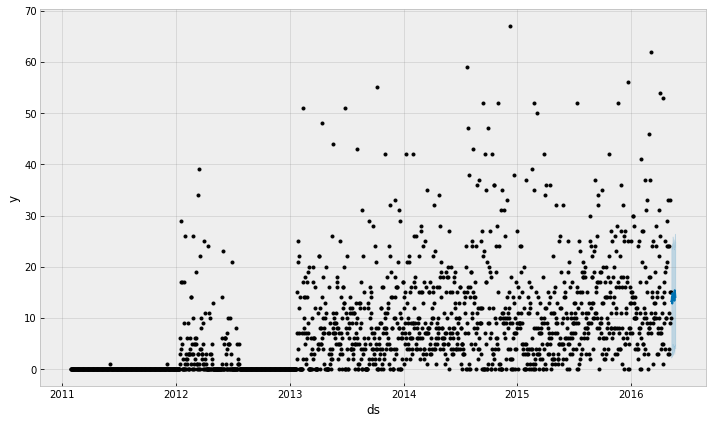

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  0        8.38
1923  2016-05-05  d_1924     11614  0        8.38
1924  2016-05-06  d_1925     11614  1        8.38
1925  2016-05-07  d_1926     11615  0        8.38
1926  2016-05-08  d_1927     11615  0        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:56:41 - cmdstanpy - INFO - Chain [1] start processing
21:56:41 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29  0.025361   -0.622302    0.915825     0.025361     0.025361   
1    2011-01-30  0.026263   -0.647467    0.828663     0.026263     0.026263   
2    2011-01-31  0.027166   -0.732187    0.804825     0.027166     0.027166   
3    2011-02-01  0.028068   -0.779904    0.772812     0.028068     0.028068   
4    2011-02-02  0.028971   -0.816590    0.687005     0.028971     0.028971   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  0.598189   -0.189599    1.293646     0.598189     0.598189   
1937 2016-05-19  0.598879   -0.212245    1.296245     0.598879     0.598879   
1938 2016-05-20  0.599570   -0.171959    1.287659     0.599570     0.599

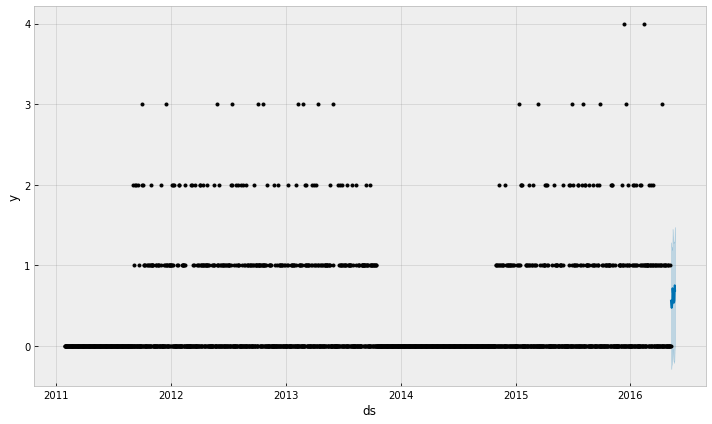

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  2         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  1         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  1         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  0        8.38
1923  2016-05-05  d_1924     11614  0        8.38
1924  2016-05-06  d_1925     11614  0        8.38
1925  2016-05-07  d_1926     11615  0        8.38
1926  2016-05-08  d_1927     11615  0        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:56:43 - cmdstanpy - INFO - Chain [1] start processing
21:56:43 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29  0.551647   -0.282433    2.312287     0.551647     0.551647   
1    2011-01-30  0.552297   -0.436496    2.110576     0.552297     0.552297   
2    2011-01-31  0.552947   -0.493737    1.964826     0.552947     0.552947   
3    2011-02-01  0.553597   -0.642965    1.897851     0.553597     0.553597   
4    2011-02-02  0.554247   -0.616161    1.794168     0.554247     0.554247   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  1.540946    0.308671    2.892827     1.540946     1.540946   
1937 2016-05-19  1.542450    0.424361    2.930060     1.542450     1.542450   
1938 2016-05-20  1.543954    0.388040    3.154176     1.543954     1.543

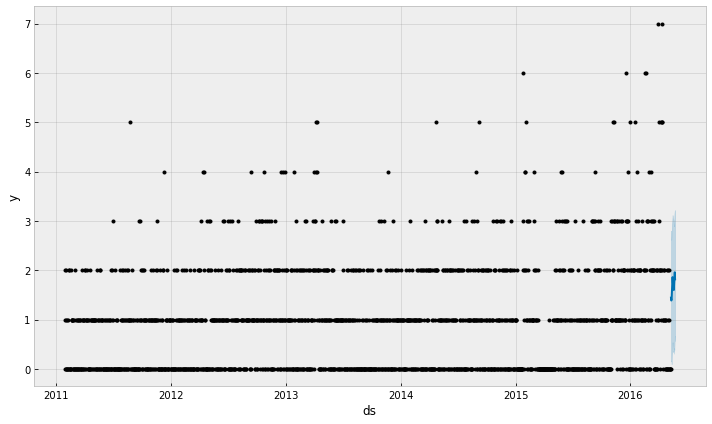

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  0        8.38
1923  2016-05-05  d_1924     11614  0        8.38
1924  2016-05-06  d_1925     11614  1        8.38
1925  2016-05-07  d_1926     11615  0        8.38
1926  2016-05-08  d_1927     11615  0        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:56:45 - cmdstanpy - INFO - Chain [1] start processing
21:56:45 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29 -0.009192   -0.427289    0.527073    -0.009192    -0.009192   
1    2011-01-30 -0.009164   -0.385295    0.555419    -0.009164    -0.009164   
2    2011-01-31 -0.009135   -0.462280    0.514731    -0.009135    -0.009135   
3    2011-02-01 -0.009107   -0.484591    0.500107    -0.009107    -0.009107   
4    2011-02-02 -0.009078   -0.500266    0.479008    -0.009078    -0.009078   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  0.221089   -0.283122    0.661732     0.221089     0.221089   
1937 2016-05-19  0.221063   -0.293310    0.690503     0.221063     0.221063   
1938 2016-05-20  0.221038   -0.329057    0.660071     0.221038     0.221

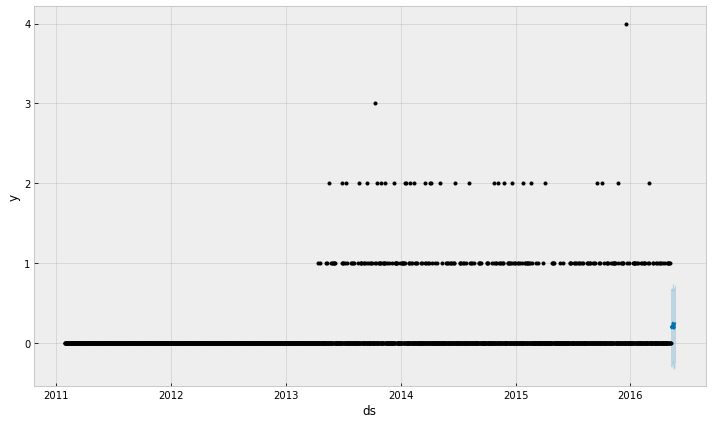

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  0        8.38
1923  2016-05-05  d_1924     11614  0        8.38
1924  2016-05-06  d_1925     11614  0        8.38
1925  2016-05-07  d_1926     11615  0        8.38
1926  2016-05-08  d_1927     11615  0        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:56:47 - cmdstanpy - INFO - Chain [1] start processing
21:56:48 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29 -0.022961   -0.383682    0.363450    -0.022961    -0.022961   
1    2011-01-30 -0.022802   -0.373978    0.341324    -0.022802    -0.022802   
2    2011-01-31 -0.022644   -0.425628    0.330442    -0.022644    -0.022644   
3    2011-02-01 -0.022485   -0.385074    0.316842    -0.022485    -0.022485   
4    2011-02-02 -0.022326   -0.432497    0.287145    -0.022326    -0.022326   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  0.132320   -0.269566    0.461679     0.132320     0.132320   
1937 2016-05-19  0.132339   -0.281341    0.426102     0.132339     0.132339   
1938 2016-05-20  0.132359   -0.229834    0.470260     0.132359     0.132

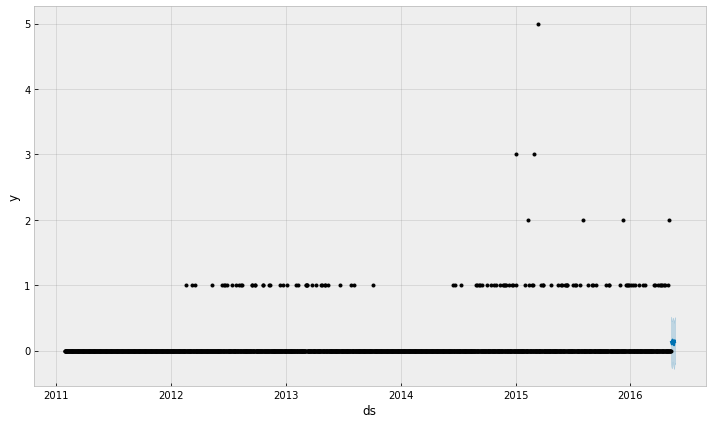

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  0        8.38
1923  2016-05-05  d_1924     11614  0        8.38
1924  2016-05-06  d_1925     11614  0        8.38
1925  2016-05-07  d_1926     11615  0        8.38
1926  2016-05-08  d_1927     11615  0        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:56:50 - cmdstanpy - INFO - Chain [1] start processing
21:56:50 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29 -0.008837   -0.475140    0.562691    -0.008837    -0.008837   
1    2011-01-30 -0.008805   -0.599005    0.465004    -0.008805    -0.008805   
2    2011-01-31 -0.008773   -0.581160    0.463518    -0.008773    -0.008773   
3    2011-02-01 -0.008741   -0.579044    0.447311    -0.008741    -0.008741   
4    2011-02-02 -0.008708   -0.594767    0.506620    -0.008708    -0.008708   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  0.104265   -0.406681    0.650625     0.104265     0.104265   
1937 2016-05-19  0.104258   -0.390407    0.676952     0.104258     0.104258   
1938 2016-05-20  0.104251   -0.440661    0.671510     0.104251     0.104

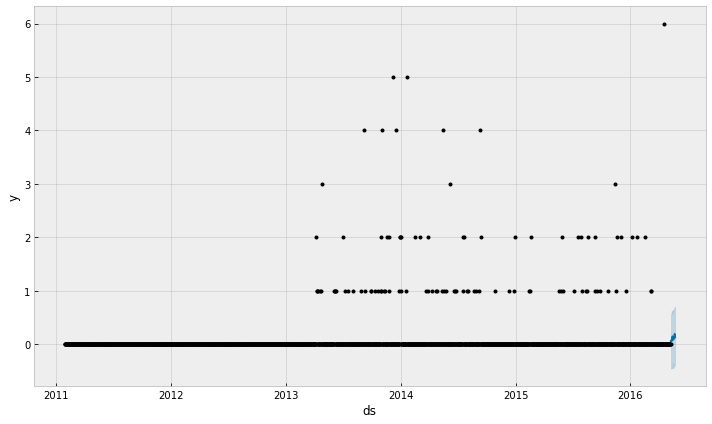

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  0        8.38
1923  2016-05-05  d_1924     11614  0        8.38
1924  2016-05-06  d_1925     11614  0        8.38
1925  2016-05-07  d_1926     11615  1        8.38
1926  2016-05-08  d_1927     11615  0        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:56:52 - cmdstanpy - INFO - Chain [1] start processing
21:56:53 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29 -0.004300   -0.371731    0.452165    -0.004300    -0.004300   
1    2011-01-30 -0.004284   -0.428204    0.436533    -0.004284    -0.004284   
2    2011-01-31 -0.004269   -0.482294    0.393707    -0.004269    -0.004269   
3    2011-02-01 -0.004253   -0.440494    0.393711    -0.004253    -0.004253   
4    2011-02-02 -0.004237   -0.452480    0.375085    -0.004237    -0.004237   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  0.349406   -0.126767    0.698846     0.349406     0.349406   
1937 2016-05-19  0.349829   -0.123670    0.733336     0.349829     0.349829   
1938 2016-05-20  0.350252   -0.103713    0.728301     0.350252     0.350

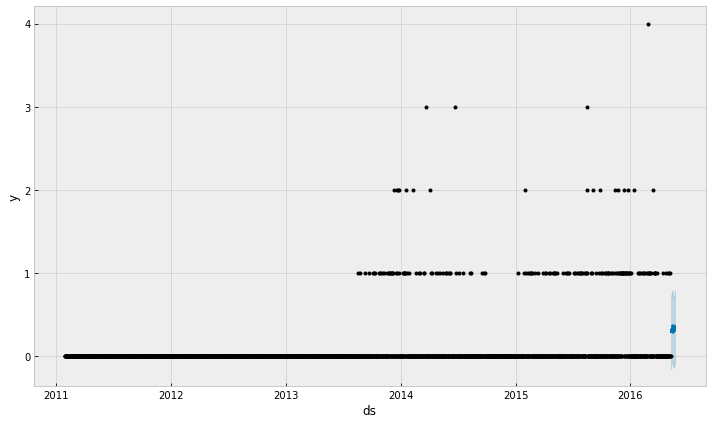

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  2         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  4        8.38
1923  2016-05-05  d_1924     11614  2        8.38
1924  2016-05-06  d_1925     11614  1        8.38
1925  2016-05-07  d_1926     11615  2        8.38
1926  2016-05-08  d_1927     11615  5        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:56:55 - cmdstanpy - INFO - Chain [1] start processing
21:56:55 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29  1.090083   -0.558946    3.541490     1.090083     1.090083   
1    2011-01-30  1.090853   -0.490047    3.845536     1.090853     1.090853   
2    2011-01-31  1.091623   -1.023765    3.333699     1.091623     1.091623   
3    2011-02-01  1.092392   -1.470125    2.796643     1.092392     1.092392   
4    2011-02-02  1.093162   -1.430267    2.827239     1.093162     1.093162   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  2.016034   -0.230905    3.911194     2.016034     2.016034   
1937 2016-05-19  2.016235   -0.424151    3.786682     2.016235     2.016235   
1938 2016-05-20  2.016435   -0.069034    4.014334     2.016435     2.016

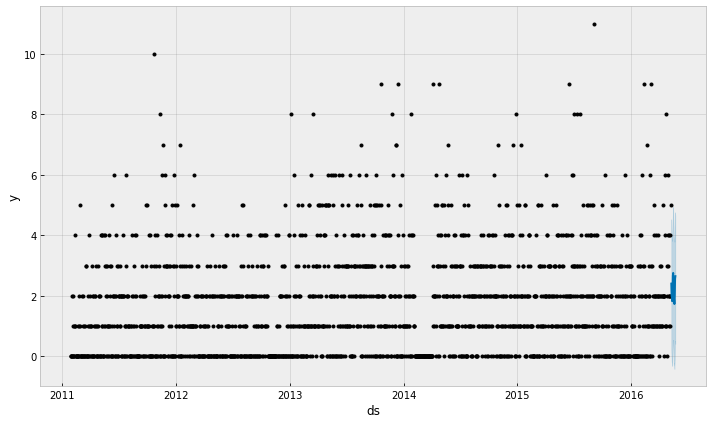

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  0        8.38
1923  2016-05-05  d_1924     11614  0        8.38
1924  2016-05-06  d_1925     11614  0        8.38
1925  2016-05-07  d_1926     11615  4        8.38
1926  2016-05-08  d_1927     11615  3        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:56:57 - cmdstanpy - INFO - Chain [1] start processing
21:56:57 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29 -0.153935   -1.523922    1.830611    -0.153935    -0.153935   
1    2011-01-30 -0.153408   -1.581478    1.589606    -0.153408    -0.153408   
2    2011-01-31 -0.152881   -1.932652    1.475089    -0.152881    -0.152881   
3    2011-02-01 -0.152353   -1.859192    1.394072    -0.152353    -0.152353   
4    2011-02-02 -0.151826   -1.879756    1.364243    -0.151826    -0.151826   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  1.710604    0.302784    3.638557     1.710604     1.710604   
1937 2016-05-19  1.710646    0.269023    3.538909     1.710646     1.710646   
1938 2016-05-20  1.710689    0.569336    3.749173     1.710689     1.710

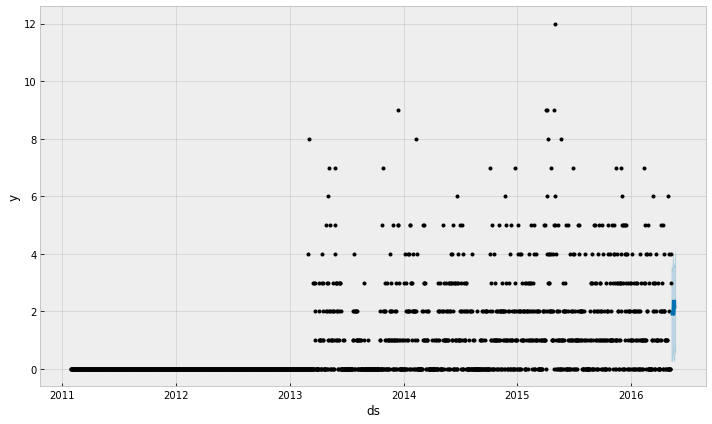

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  0        8.38
1923  2016-05-05  d_1924     11614  4        8.38
1924  2016-05-06  d_1925     11614  0        8.38
1925  2016-05-07  d_1926     11615  1        8.38
1926  2016-05-08  d_1927     11615  0        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:56:59 - cmdstanpy - INFO - Chain [1] start processing
21:57:00 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29 -0.048802   -1.344225    0.842902    -0.048802    -0.048802   
1    2011-01-30 -0.048515   -1.265022    0.864809    -0.048515    -0.048515   
2    2011-01-31 -0.048228   -1.493808    0.711352    -0.048228    -0.048228   
3    2011-02-01 -0.047941   -1.487339    0.704084    -0.047941    -0.047941   
4    2011-02-02 -0.047654   -1.520495    0.584797    -0.047654    -0.047654   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  1.111639   -0.050389    2.100253     1.111639     1.111639   
1937 2016-05-19  1.111988    0.103617    2.280578     1.111988     1.111988   
1938 2016-05-20  1.112337    0.136077    2.402718     1.112337     1.112

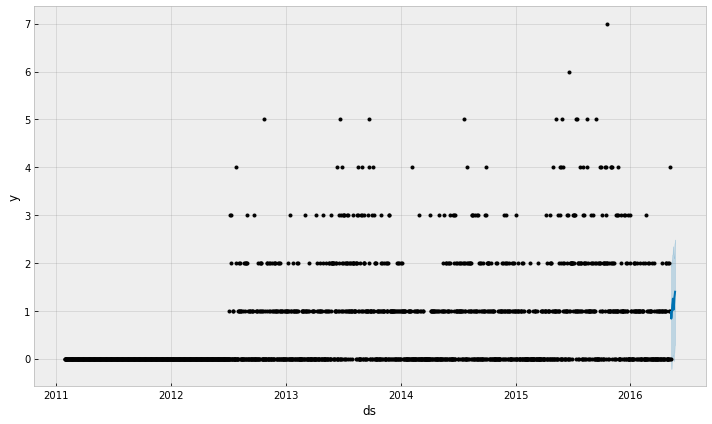

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  1         NaN
1     2011-01-30     d_2     11101  2         NaN
2     2011-01-31     d_3     11101  3         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  0        8.38
1923  2016-05-05  d_1924     11614  0        8.38
1924  2016-05-06  d_1925     11614  0        8.38
1925  2016-05-07  d_1926     11615  0        8.38
1926  2016-05-08  d_1927     11615  0        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:57:02 - cmdstanpy - INFO - Chain [1] start processing
21:57:02 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29  0.604098   -0.164811    1.665936     0.604098     0.604098   
1    2011-01-30  0.603702   -0.150953    1.775551     0.603702     0.603702   
2    2011-01-31  0.603305   -0.482999    1.413734     0.603305     0.603305   
3    2011-02-01  0.602909   -0.484840    1.512753     0.602909     0.602909   
4    2011-02-02  0.602513   -0.443369    1.468595     0.602513     0.602513   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  0.292830   -0.968433    0.883552     0.292830     0.292830   
1937 2016-05-19  0.292604   -0.897336    1.091408     0.292604     0.292604   
1938 2016-05-20  0.292378   -0.790969    1.019592     0.292378     0.292

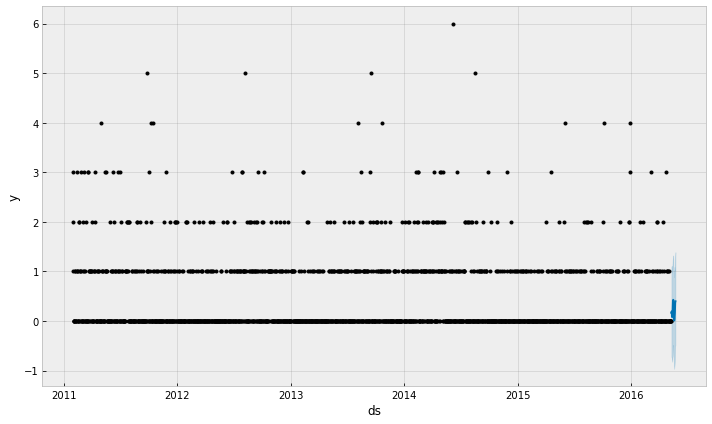

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  0        8.38
1923  2016-05-05  d_1924     11614  0        8.38
1924  2016-05-06  d_1925     11614  3        8.38
1925  2016-05-07  d_1926     11615  0        8.38
1926  2016-05-08  d_1927     11615  1        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:57:04 - cmdstanpy - INFO - Chain [1] start processing
21:57:05 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29 -0.032810   -0.604483    0.502638    -0.032810    -0.032810   
1    2011-01-30 -0.032604   -0.593931    0.547870    -0.032604    -0.032604   
2    2011-01-31 -0.032397   -0.626565    0.484141    -0.032397    -0.032397   
3    2011-02-01 -0.032191   -0.691322    0.476574    -0.032191    -0.032191   
4    2011-02-02 -0.031984   -0.717718    0.509759    -0.031984    -0.031984   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  0.533416   -0.078761    1.129815     0.533416     0.533416   
1937 2016-05-19  0.533935   -0.026853    1.072997     0.533935     0.533935   
1938 2016-05-20  0.534453   -0.027059    1.137061     0.534453     0.534

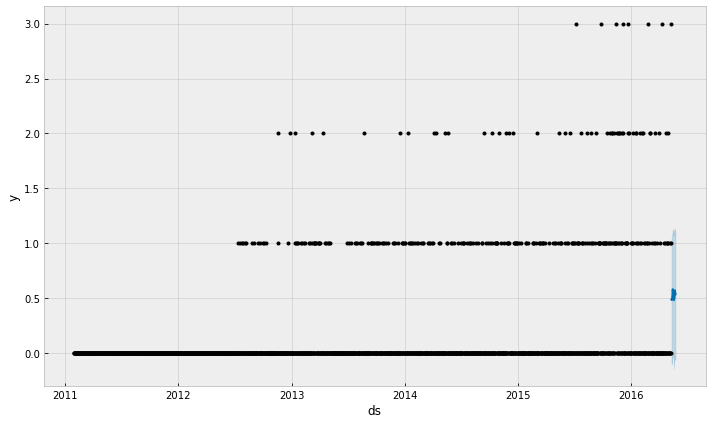

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  1         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  1         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  0        8.38
1923  2016-05-05  d_1924     11614  0        8.38
1924  2016-05-06  d_1925     11614  0        8.38
1925  2016-05-07  d_1926     11615  1        8.38
1926  2016-05-08  d_1927     11615  0        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:57:07 - cmdstanpy - INFO - Chain [1] start processing
21:57:07 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29  0.509083   -0.212604    1.386923     0.509083     0.509083   
1    2011-01-30  0.508633   -0.188473    1.390841     0.508633     0.508633   
2    2011-01-31  0.508184   -0.418973    1.252136     0.508184     0.508184   
3    2011-02-01  0.507734   -0.381550    1.257175     0.507734     0.507734   
4    2011-02-02  0.507285   -0.411754    1.147337     0.507285     0.507285   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  0.055009   -0.716294    0.824325     0.055009     0.055009   
1937 2016-05-19  0.054627   -0.737201    0.853321     0.054627     0.054627   
1938 2016-05-20  0.054246   -0.705135    0.940181     0.054246     0.054

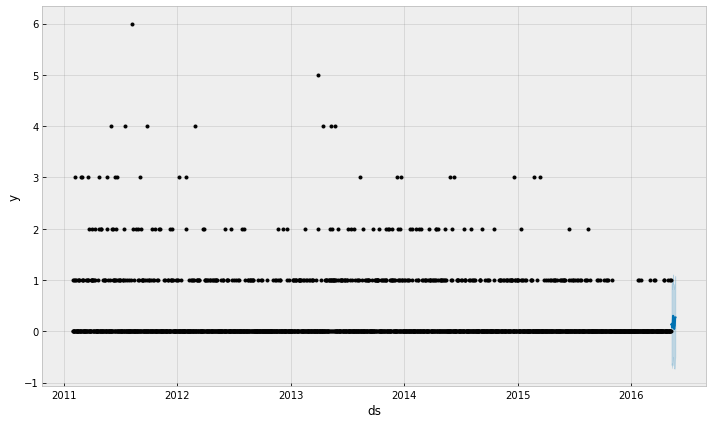

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  0        8.38
1923  2016-05-05  d_1924     11614  0        8.38
1924  2016-05-06  d_1925     11614  0        8.38
1925  2016-05-07  d_1926     11615  0        8.38
1926  2016-05-08  d_1927     11615  0        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:57:09 - cmdstanpy - INFO - Chain [1] start processing
21:57:09 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29 -0.013122   -0.408813    0.304810    -0.013122    -0.013122   
1    2011-01-30 -0.013091   -0.391941    0.388664    -0.013091    -0.013091   
2    2011-01-31 -0.013060   -0.423650    0.337333    -0.013060    -0.013060   
3    2011-02-01 -0.013029   -0.448977    0.337057    -0.013029    -0.013029   
4    2011-02-02 -0.012998   -0.437264    0.330338    -0.012998    -0.012998   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  0.126760   -0.267259    0.491802     0.126760     0.126760   
1937 2016-05-19  0.126743   -0.216306    0.504048     0.126743     0.126743   
1938 2016-05-20  0.126726   -0.240071    0.518635     0.126726     0.126

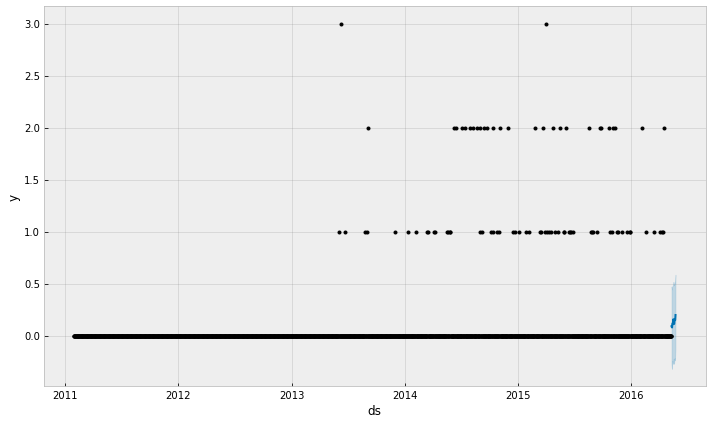

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  1        8.38
1923  2016-05-05  d_1924     11614  0        8.38
1924  2016-05-06  d_1925     11614  0        8.38
1925  2016-05-07  d_1926     11615  0        8.38
1926  2016-05-08  d_1927     11615  0        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:57:11 - cmdstanpy - INFO - Chain [1] start processing
21:57:11 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29  0.467308   -0.201483    0.978226     0.467308     0.467308   
1    2011-01-30  0.466793   -0.055907    1.046544     0.466793     0.466793   
2    2011-01-31  0.466279   -0.212206    0.865255     0.466279     0.466279   
3    2011-02-01  0.465764   -0.225073    0.892538     0.465764     0.465764   
4    2011-02-02  0.465250   -0.141412    0.932421     0.465250     0.465250   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  0.110340   -0.386297    0.754535     0.110340     0.110340   
1937 2016-05-19  0.110335   -0.375996    0.696995     0.110335     0.110335   
1938 2016-05-20  0.110330   -0.408350    0.681967     0.110330     0.110

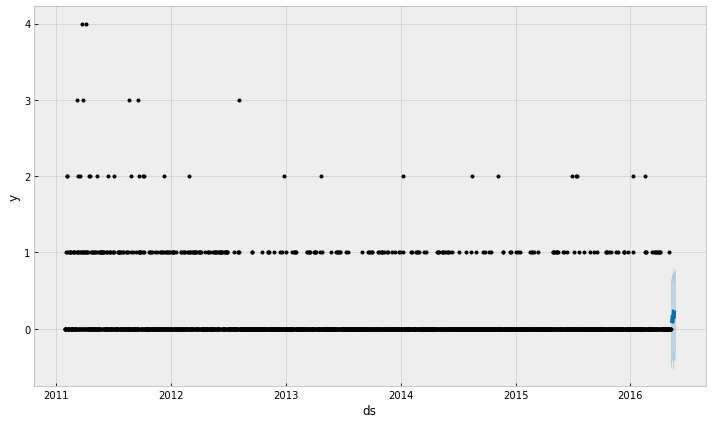

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  0        8.38
1923  2016-05-05  d_1924     11614  2        8.38
1924  2016-05-06  d_1925     11614  0        8.38
1925  2016-05-07  d_1926     11615  0        8.38
1926  2016-05-08  d_1927     11615  0        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:57:13 - cmdstanpy - INFO - Chain [1] start processing
21:57:14 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29  0.758163   -0.526333    3.026724     0.758163     0.758163   
1    2011-01-30  0.759632   -0.243214    3.160252     0.759632     0.759632   
2    2011-01-31  0.761102   -0.823878    2.499705     0.761102     0.761102   
3    2011-02-01  0.762571   -1.187594    2.205333     0.762571     0.762571   
4    2011-02-02  0.764040   -1.078404    2.472013     0.764040     0.764040   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  1.695830   -0.872989    2.793610     1.695830     1.695830   
1937 2016-05-19  1.695444   -0.784342    2.691363     1.695444     1.695444   
1938 2016-05-20  1.695057   -0.580604    3.001159     1.695057     1.695

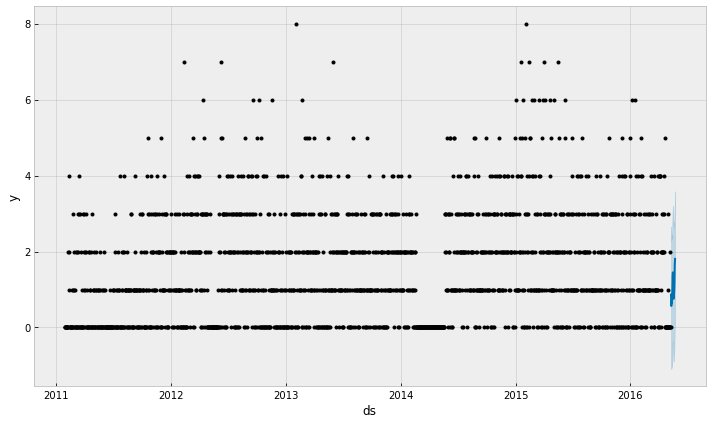

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  0        8.38
1923  2016-05-05  d_1924     11614  0        8.38
1924  2016-05-06  d_1925     11614  0        8.38
1925  2016-05-07  d_1926     11615  0        8.38
1926  2016-05-08  d_1927     11615  0        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:57:16 - cmdstanpy - INFO - Chain [1] start processing
21:57:16 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29 -0.024606   -0.396607    0.321638    -0.024606    -0.024606   
1    2011-01-30 -0.024407   -0.412265    0.344394    -0.024407    -0.024407   
2    2011-01-31 -0.024209   -0.477331    0.315153    -0.024209    -0.024209   
3    2011-02-01 -0.024010   -0.479418    0.301142    -0.024010    -0.024010   
4    2011-02-02 -0.023812   -0.474467    0.299223    -0.023812    -0.023812   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  0.038135   -0.313048    0.424938     0.038135     0.038135   
1937 2016-05-19  0.038004   -0.303900    0.449217     0.038004     0.038004   
1938 2016-05-20  0.037872   -0.294443    0.466820     0.037872     0.037

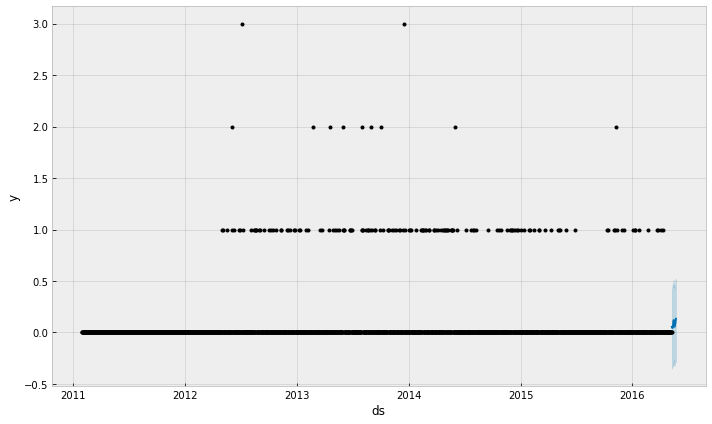

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  0        8.38
1923  2016-05-05  d_1924     11614  0        8.38
1924  2016-05-06  d_1925     11614  0        8.38
1925  2016-05-07  d_1926     11615  0        8.38
1926  2016-05-08  d_1927     11615  0        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:57:18 - cmdstanpy - INFO - Chain [1] start processing
21:57:19 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29 -0.005618   -1.349994    1.284524    -0.005618    -0.005618   
1    2011-01-30 -0.005610   -1.475554    1.115568    -0.005610    -0.005610   
2    2011-01-31 -0.005601   -1.360341    1.286036    -0.005601    -0.005601   
3    2011-02-01 -0.005592   -1.390259    1.197059    -0.005592    -0.005592   
4    2011-02-02 -0.005584   -1.519347    1.078688    -0.005584    -0.005584   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  0.931936   -0.305906    2.330911     0.931936     0.931936   
1937 2016-05-19  0.932918   -0.252347    2.236621     0.932918     0.932918   
1938 2016-05-20  0.933900   -0.193108    2.397671     0.933900     0.933

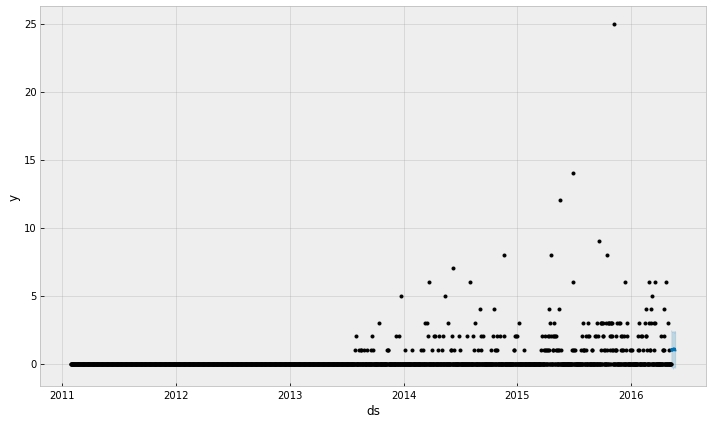

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk   y  sell_price
0     2011-01-29     d_1     11101   0         NaN
1     2011-01-30     d_2     11101   7         NaN
2     2011-01-31     d_3     11101   6         NaN
3     2011-02-01     d_4     11101   7         NaN
4     2011-02-02     d_5     11101   4         NaN
...          ...     ...       ...  ..         ...
1922  2016-05-04  d_1923     11614   5        8.38
1923  2016-05-05  d_1924     11614   0        8.38
1924  2016-05-06  d_1925     11614   0        8.38
1925  2016-05-07  d_1926     11615   0        8.38
1926  2016-05-08  d_1927     11615  10        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:57:21 - cmdstanpy - INFO - Chain [1] start processing
21:57:21 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29  8.525088   -1.798017   18.918586     8.525088     8.525088   
1    2011-01-30  8.521694   -1.960274   17.839307     8.521694     8.521694   
2    2011-01-31  8.518301   -1.738387   18.910190     8.518301     8.518301   
3    2011-02-01  8.514907   -2.425145   18.305904     8.514907     8.514907   
4    2011-02-02  8.511513   -3.207206   17.527935     8.511513     8.511513   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  4.699827   -6.344929   14.377409     4.699827     4.699827   
1937 2016-05-19  4.703535   -6.254707   14.008687     4.703535     4.703535   
1938 2016-05-20  4.707244   -6.628390   13.829546     4.707244     4.707

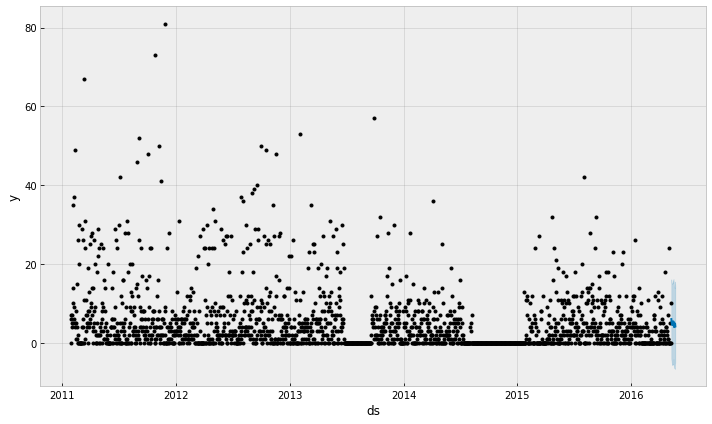

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  1         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  2         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  1         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  1        8.38
1923  2016-05-05  d_1924     11614  1        8.38
1924  2016-05-06  d_1925     11614  0        8.38
1925  2016-05-07  d_1926     11615  1        8.38
1926  2016-05-08  d_1927     11615  0        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:57:24 - cmdstanpy - INFO - Chain [1] start processing
21:57:24 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29  1.164275    0.092705    2.993444     1.164275     1.164275   
1    2011-01-30  1.163771   -0.475205    2.298041     1.163771     1.163771   
2    2011-01-31  1.163268   -0.373534    2.634347     1.163268     1.163268   
3    2011-02-01  1.162764   -0.492454    2.451999     1.162764     1.162764   
4    2011-02-02  1.162260   -0.417570    2.583937     1.162260     1.162260   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  0.990485   -0.480789    2.454724     0.990485     0.990485   
1937 2016-05-19  0.990618   -0.388388    2.575308     0.990618     0.990618   
1938 2016-05-20  0.990750   -0.479221    2.610267     0.990750     0.990

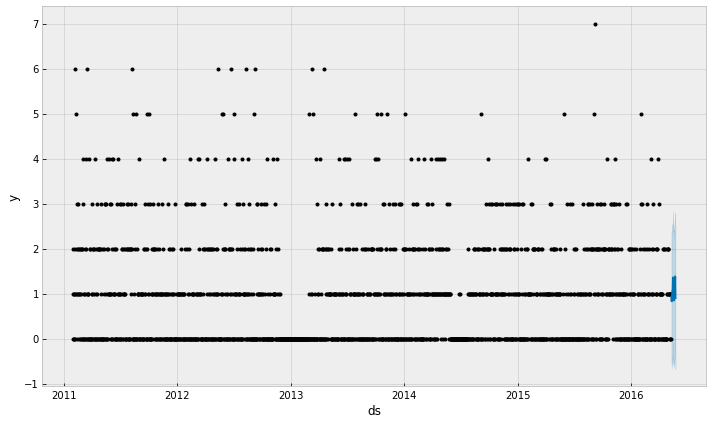

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  0        8.38
1923  2016-05-05  d_1924     11614  0        8.38
1924  2016-05-06  d_1925     11614  0        8.38
1925  2016-05-07  d_1926     11615  0        8.38
1926  2016-05-08  d_1927     11615  0        8.38

[1927 rows x 5 columns]
-------------------
wataru


21:57:26 - cmdstanpy - INFO - Chain [1] start processing
21:57:26 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2011-01-29
1    2011-01-30
2    2011-01-31
3    2011-02-01
4    2011-02-02
...         ...
1936 2016-05-18
1937 2016-05-19
1938 2016-05-20
1939 2016-05-21
1940 2016-05-22

[1941 rows x 1 columns]
             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2011-01-29 -0.082163   -0.747020    0.999129    -0.082163    -0.082163   
1    2011-01-30 -0.080857   -0.980831    0.720621    -0.080857    -0.080857   
2    2011-01-31 -0.079551   -0.841468    0.800056    -0.079551    -0.079551   
3    2011-02-01 -0.078244   -1.048345    0.710630    -0.078244    -0.078244   
4    2011-02-02 -0.076938   -1.007887    0.708527    -0.076938    -0.076938   
...         ...       ...         ...         ...          ...          ...   
1936 2016-05-18  0.236099   -0.631869    1.023648     0.236099     0.236099   
1937 2016-05-19  0.235851   -0.666689    0.967097     0.235851     0.235851   
1938 2016-05-20  0.235602   -0.496824    1.086348     0.235602     0.235

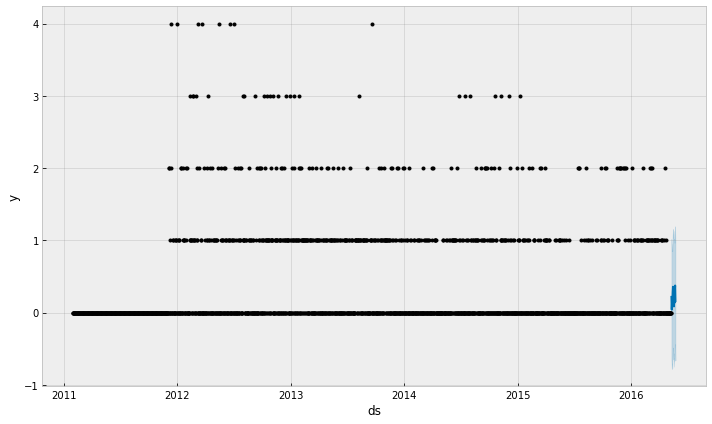

C:\Users\sasa4\AppData\Local\Temp\ipykernel_18224\1404060091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values


              ds       d  wm_yr_wk  y  sell_price
0     2011-01-29     d_1     11101  0         NaN
1     2011-01-30     d_2     11101  0         NaN
2     2011-01-31     d_3     11101  0         NaN
3     2011-02-01     d_4     11101  0         NaN
4     2011-02-02     d_5     11101  0         NaN
...          ...     ...       ... ..         ...
1922  2016-05-04  d_1923     11614  0        8.38
1923  2016-05-05  d_1924     11614  0        8.38
1924  2016-05-06  d_1925     11614  0        8.38
1925  2016-05-07  d_1926     11615  0        8.38
1926  2016-05-08  d_1927     11615  0        8.38

[1927 rows x 5 columns]
-------------------
wataru


KeyboardInterrupt: 

In [3]:
for i in range(train.shape[0]):
    df = pd.DataFrame(calendar[['date', 'd', 'wm_yr_wk']])
    df_train =  df.loc[0:1926]
    df_test = df.loc[1927:]
    #print(df_train)
    #print(df_test)
    df_train['y'] = train.loc[i,'d_1':].values
    df_train = pd.merge(df_train, price[(price['store_id'] == train.loc[i,'store_id']) & (price['item_id'] == train.loc[0,'item_id'])][['wm_yr_wk', 'sell_price']], how='left', on=['wm_yr_wk'])
    df_train = df_train.rename(columns={'date': 'ds'})
    #df_train = df_train.drop(["price"], axis=1)
    print(df_train)
    print("-------------------")

    print("wataru")
    
    model = Prophet()
    model.fit(df_train)
    future = model.make_future_dataframe(periods=14)
    print("futue is")
    print(future)
    forecast = model.predict(future)
    print(forecast)
    model.plot(forecast.tail(14))
    plt.show()
    #df_train.to_csv('df_train' + str(i) + '.csv', index=False)